# Exploratory Dataset Analysis - Data Negara

# A. Introduction

**Kenang Ghalih Diasthama** 

### Project Overview

dataset yang digunakan ..... dengan clusteirng


### Objective

Untuk mengkategorikan negara menggunakan faktor sosial ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan.

### Tentang Organisasi:

HELP International adalah LSM kemanusiaan internasional yang berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara terbelakang saat terjadi bencana dan bencana alam.

### Permasalahan:

HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, Tugas teman-teman  adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kalian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.

### Penjelasan kolom fitur:

* Negara : Nama negara
* Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
* Ekspor : Ekspor barang dan jasa perkapita
* Kesehatan: Total pengeluaran kesehatan perkapita
* Impor: Impor barang dan jasa perkapita
* Pendapatan: Penghasilan bersih perorang
* Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 
* Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
* Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
* GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi. 

### Penentuan pengambilan Features

Disini saya memilih features kematian anak dan inflasi sebagai clustering. Namun, clustering tidak bisa dilakukan karena harus mengecek data apakah memiliki outlier dan missing value. Maka, dilakukan tahapan-tahapan berikut:

# B. Import Libraries

In [1]:
!pip install sklearn-pandas
from sklearn_pandas import DataFrameMapper
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import skew

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")

# C. Load Dataset

### Melihat dataset yang sudah diimport

In [2]:
data = pd.read_csv('Data_Negara_HELP.csv')
data

Negara  Kematian_anak  Ekspor  Kesehatan  Impor  Pendapatan  \
0            Afghanistan           90.2    10.0       7.58   44.9        1610   
1                Albania           16.6    28.0       6.55   48.6        9930   
2                Algeria           27.3    38.4       4.17   31.4       12900   
3                 Angola          119.0    62.3       2.85   42.9        5900   
4    Antigua and Barbuda           10.3    45.5       6.03   58.9       19100   
..                   ...            ...     ...        ...    ...         ...   
162              Vanuatu           29.2    46.6       5.25   52.7        2950   
163            Venezuela           17.1    28.5       4.91   17.6       16500   
164              Vietnam           23.3    72.0       6.84   80.2        4490   
165                Yemen           56.3    30.0       5.18   34.4        4480   
166               Zambia           83.1    37.0       5.89   30.9        3280   

     Inflasi  Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
0       9.44           56.2              5.82           553  
1       4.49           76.3              1.65          4090  
2      16.10           76.5              2.89          4460  
3      22.40           60.1              6.16          3530  
4       1.44           76.8              2.13         12200  
..       ...            ...               ...           ...  
162     2.62           63.0              3.50          2970  
163    45.90           75.4              2.47         13500  
164    12.10           73.1              1.95          1310  
165    23.60           67.5              4.67          1310  
166    14.00           52.0              5.40          1460  

[167 rows x 10 columns]

In [3]:
df = data.copy()
df.head()

Negara  Kematian_anak  Ekspor  Kesehatan  Impor  Pendapatan  \
0          Afghanistan           90.2    10.0       7.58   44.9        1610   
1              Albania           16.6    28.0       6.55   48.6        9930   
2              Algeria           27.3    38.4       4.17   31.4       12900   
3               Angola          119.0    62.3       2.85   42.9        5900   
4  Antigua and Barbuda           10.3    45.5       6.03   58.9       19100   

   Inflasi  Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
0     9.44           56.2              5.82           553  
1     4.49           76.3              1.65          4090  
2    16.10           76.5              2.89          4460  
3    22.40           60.1              6.16          3530  
4     1.44           76.8              2.13         12200

### Menampilkan informasi dataset mengenai columns, data type, dan missing value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.columns

Index(['Negara', 'Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan',
       'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita'],
      dtype='object')

In [6]:
# Python code to convert all string
# from uppercase to lowercase.
 
# Using map function
out = map(lambda x:x.lower(), ['Negara', 'Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan',
       'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita'])
 
# Converting it into list
output = list(out)
 
# printing output
print(output)

['negara', 'kematian_anak', 'ekspor', 'kesehatan', 'impor', 'pendapatan', 'inflasi', 'harapan_hidup', 'jumlah_fertiliti', 'gdpperkapita']


In [7]:
df.describe().T

count          mean           std       min       25%  \
Kematian_anak     167.0     38.270060     40.328931    2.6000     8.250   
Ekspor            167.0     41.108976     27.412010    0.1090    23.800   
Kesehatan         167.0      6.815689      2.746837    1.8100     4.920   
Impor             167.0     46.890215     24.209589    0.0659    30.200   
Pendapatan        167.0  17144.688623  19278.067698  609.0000  3355.000   
Inflasi           167.0      7.781832     10.570704   -4.2100     1.810   
Harapan_hidup     167.0     70.555689      8.893172   32.1000    65.300   
Jumlah_fertiliti  167.0      2.947964      1.513848    1.1500     1.795   
GDPperkapita      167.0  12964.155689  18328.704809  231.0000  1330.000   

                      50%       75%        max  
Kematian_anak       19.30     62.10     208.00  
Ekspor              35.00     51.35     200.00  
Kesehatan            6.32      8.60      17.90  
Impor               43.30     58.75     174.00  
Pendapatan        9960.00  22800.00  125000.00  
Inflasi              5.39     10.75     104.00  
Harapan_hidup       73.10     76.80      82.80  
Jumlah_fertiliti     2.41      3.88       7.49  
GDPperkapita      4660.00  14050.00  105000.00

# D. Eksplorasi Data

### Cek distribusi masing-masing kolom pada dataset.

In [8]:
obj_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()

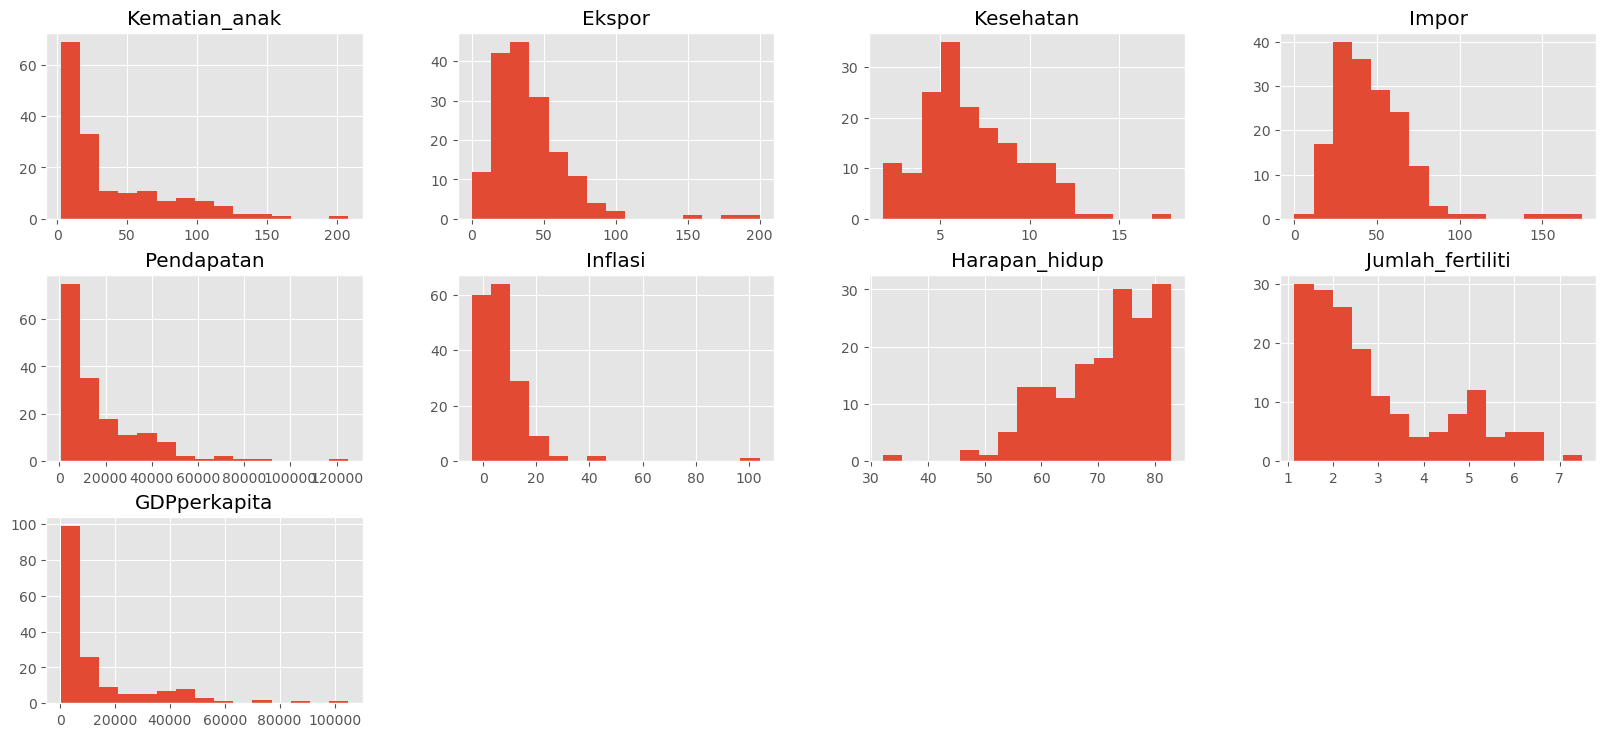

In [9]:
df[num_cols].hist(bins=15, figsize=(20, 15), layout=(5, 4));

Visualisasi histogram pada tiap kolom diatas beragam tiap data features.

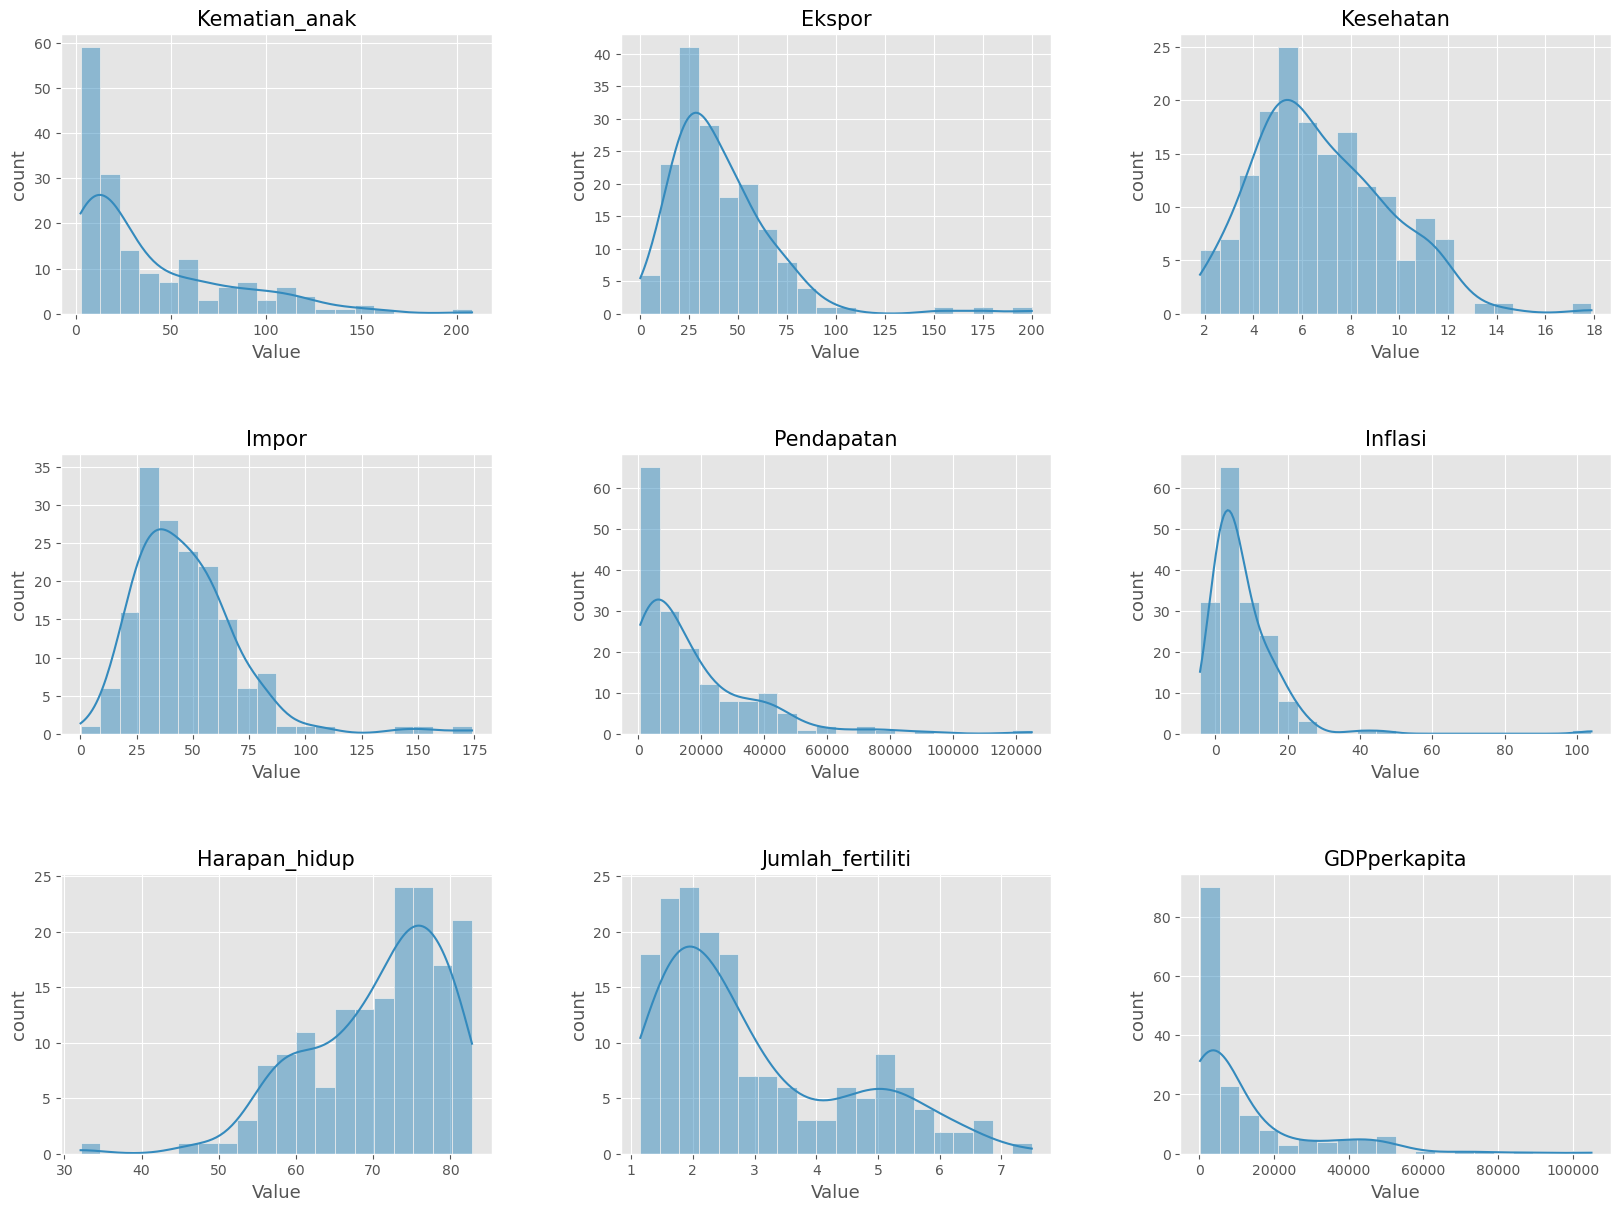

In [10]:
var_col = ['Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan',
       'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita']
intr_cols = ['kematian_anak', 'ekspor', 'kesehatan', 'impor', 
             'pendapatan', 'inflasi', 'harapan_hidup', 'jumlah_fertiliti', 'gdpperkapita']
plt.figure(figsize=(20,20))
for i, col in enumerate(var_col):
    plt.subplot(4,3,i+1)
    plt.title(col, fontsize=15)
    plt.xlabel("Value", fontsize=13)
    plt.ylabel("count", fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df, x=col, bins=20, kde=True)

Semua fitur diatas terlihat memiliki distribusi yang tidak normal, distribusi data tersebut mengalami skewness

### Korelasi masing-masing variabel

In [11]:
df.corr()

Kematian_anak    Ekspor  Kesehatan     Impor  Pendapatan  \
Kematian_anak          1.000000 -0.318093  -0.200402 -0.127211   -0.524315   
Ekspor                -0.318093  1.000000  -0.114408  0.737381    0.516784   
Kesehatan             -0.200402 -0.114408   1.000000  0.095717    0.129579   
Impor                 -0.127211  0.737381   0.095717  1.000000    0.122406   
Pendapatan            -0.524315  0.516784   0.129579  0.122406    1.000000   
Inflasi                0.288276 -0.107294  -0.255376 -0.246994   -0.147756   
Harapan_hidup         -0.886676  0.316313   0.210692  0.054391    0.611962   
Jumlah_fertiliti       0.848478 -0.320011  -0.196674 -0.159048   -0.501840   
GDPperkapita          -0.483032  0.418725   0.345966  0.115498    0.895571   

                   Inflasi  Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
Kematian_anak     0.288276      -0.886676          0.848478     -0.483032  
Ekspor           -0.107294       0.316313         -0.320011      0.418725  
Kesehatan        -0.255376       0.210692         -0.196674      0.345966  
Impor            -0.246994       0.054391         -0.159048      0.115498  
Pendapatan       -0.147756       0.611962         -0.501840      0.895571  
Inflasi           1.000000      -0.239705          0.316921     -0.221631  
Harapan_hidup    -0.239705       1.000000         -0.760875      0.600089  
Jumlah_fertiliti  0.316921      -0.760875          1.000000     -0.454910  
GDPperkapita     -0.221631       0.600089         -0.454910      1.000000

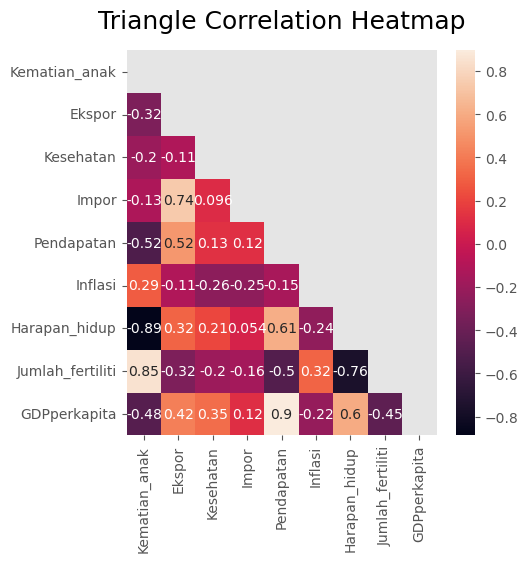

In [12]:
plt.figure(figsize=(5, 5))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), annot=True, mask=mask)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Variabel-variabel yang berkorelasi tinggi tidak berguna untuk algoritma segmentasi karena mereka merepresentasikan karakteristik yang sama dari sebuah segmen.

Variabel atau fitur yang memiliki korelasi tinggi yaitu Pendapatan dan GDPperkapita dengan skor 0.9, Kematian_anak dan Jumlah_fertiliti dengan skor 0.85, Ekspor dan Impor dengan skor 0.74.

Untuk menangani hal ini, tidak dianjurkan untuk membuang fitur, maka akan digunakan metode PCA yang mana dapat membantu mempertahankan informasi dan diwaktu yang sama bisa didapatkan variabel independent

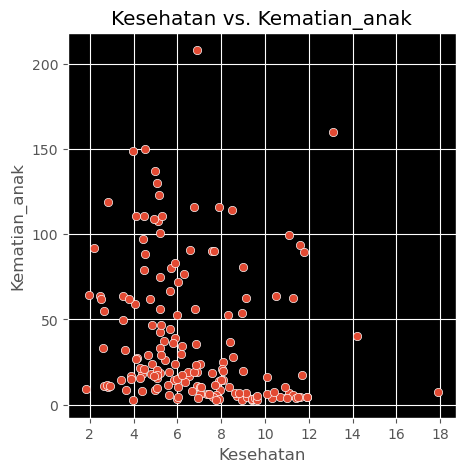

In [13]:
# membandingkan Kesehatan dan Kematian_anak
plt.figure(figsize=(5,5))
ax = plt.axes() 
ax.set_facecolor('black') 
g = sns.scatterplot(x='Kesehatan', y='Kematian_anak', data=df)
g.set_title('Kesehatan vs. Kematian_anak')
plt.show()

Dapat terlihat korelasi antar kesehatan dan kematian anak, semakin kecil nilai kesehatan maka umumnya akan menyebabkan kematian anak lebih banyak

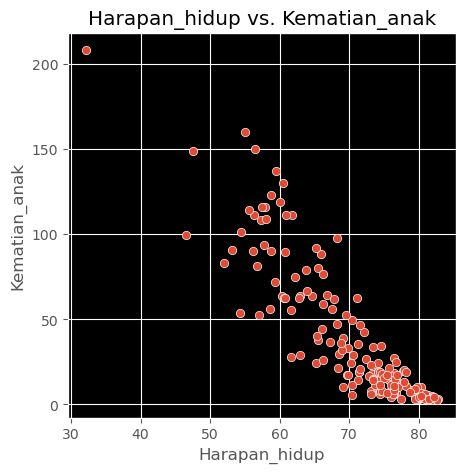

In [14]:
#membandingkan Harapan_hidup dan Kematian_anak
plt.figure(figsize=(5,5))
ax = plt.axes() 
ax.set_facecolor('black') 
g = sns.scatterplot(x='Harapan_hidup', y='Kematian_anak', data=df)
g.set_title('Harapan_hidup vs. Kematian_anak')
plt.show()

Dapat terlihat korelasi antar harapan hidup dan kematian anak, semakin besar angka harapan hidup maka akan meminimalisasikan angka kematian pada anak

# E. Data Cleaning
## Handling missing value

### Memeriksa jumlah missing value dan menanganinya pada dataset.

In [15]:
df.isnull().sum().sort_values(ascending=False)

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [16]:
df.isnull().sum().sum()

0

### Cek keberadaan duplikasi data

In [17]:
df[df.duplicated()].sum()

Negara              0.0
Kematian_anak       0.0
Ekspor              0.0
Kesehatan           0.0
Impor               0.0
Pendapatan          0.0
Inflasi             0.0
Harapan_hidup       0.0
Jumlah_fertiliti    0.0
GDPperkapita        0.0
dtype: float64

In [18]:
dup = df.duplicated()
dup.sum()

0

Hasilnya missing value serta duplikasi pada dataset sudah tidak ditemukan.

### Cek unique value berdasarkan kolom pada dataset

In [19]:
unique_val = df.nunique().sort_values(ascending=False)
unique_val = pd.DataFrame(unique_val, columns = ["Count"])
unique_val

Count
Negara              167
GDPperkapita        157
Pendapatan          156
Inflasi             156
Impor               151
Ekspor              147
Kesehatan           147
Kematian_anak       139
Jumlah_fertiliti    138
Harapan_hidup       127

In [20]:
for val in df.columns:
    print(val,': ')
    print(df[val].value_counts())
    print("  ")

Negara : 
Afghanistan    1
Morocco        1
Myanmar        1
Namibia        1
Nepal          1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zambia         1
Name: Negara, Length: 167, dtype: int64
  
Kematian_anak : 
4.5      4
3.2      3
24.1     3
4.2      3
111.0    3
        ..
55.2     1
19.2     1
29.1     1
25.1     1
83.1     1
Name: Kematian_anak, Length: 139, dtype: int64
  
Ekspor : 
23.8    3
35.0    3
37.0    2
12.4    2
14.9    2
       ..
85.8    1
21.3    1
27.9    1
22.7    1
30.0    1
Name: Ekspor, Length: 147, dtype: int64
  
Kesehatan : 
5.07    3
5.20    3
6.91    2
9.01    2
5.25    2
       ..
2.66    1
4.48    1
4.66    1
8.06    1
5.89    1
Name: Kesehatan, Length: 147, dtype: int64
  
Impor : 
28.0    2
49.6    2
26.8    2
51.3    2
63.6    2
       ..
68.7    1
23.3    1
46.6    1
26.6    1
30.9    1
Name: Impor, Length: 151, dtype: int64
  
Pendapatan : 
28300    2
36200    2
1390     2
28700    2
15400    2
        ..

# F. Handling outliers

In [21]:
df.columns

Index(['Negara', 'Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan',
       'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita'],
      dtype='object')

### Mengecek keberadaan outlier dengan hanya menampilkan variabel kontinu menggunakan box plot

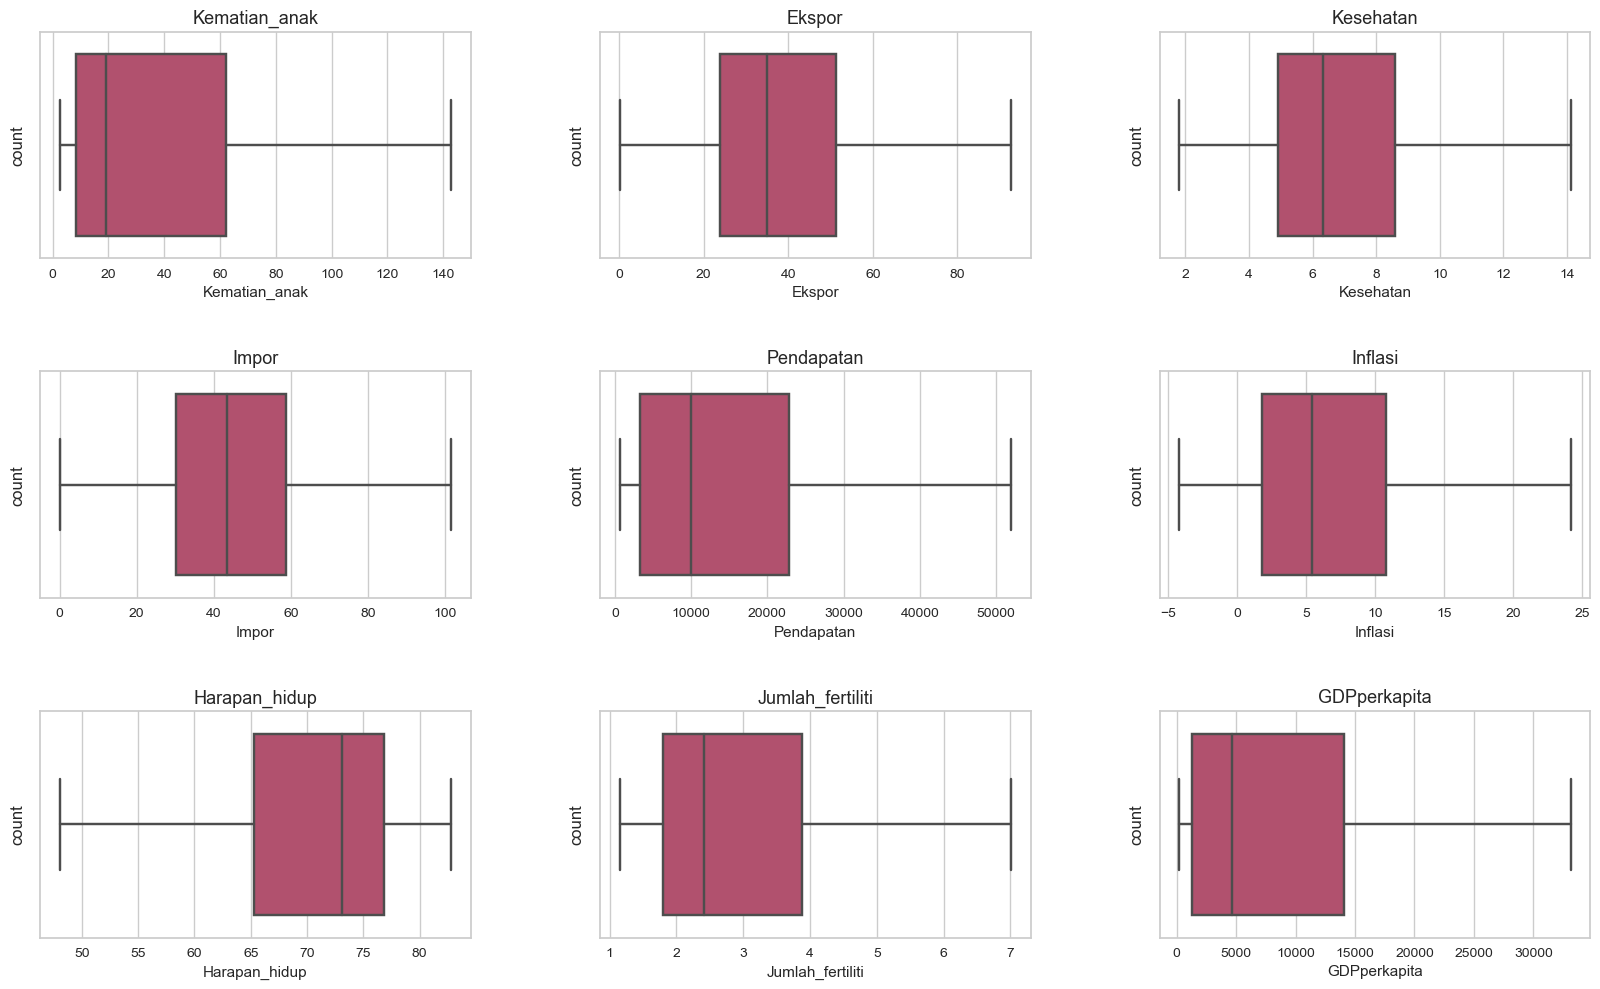

In [113]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
plt.figure(figsize =(20,25))
for i, col in enumerate(num_cols):
    plt.subplot(6,3,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel(f"skew of {col}:{skew(df[col])}")
    plt.ylabel("count",fontsize=12)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.boxplot(data=df, x=col, palette='flare', fliersize=1)

Berdasarkan visualisasi box plot diatas, terdapat beberapa kolom yang memiliki outlier. Untuk meminimalisir tejadinya outlier, maka akan dilakukan teknik untuk menghandling outlier pada kolom tersebut. Cara yang dilakukan adalah kita menghapus nilai outliernya berdasarkan range nilai tertentu. Untuk lebih jelasnya bisa liat komentar pada setiap code

In [23]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
def RemoveOutliers(num_cols):
    for col in num_cols:
        iqr = df[col].quantile(0.75)-df[col].quantile(0.25)
        lower_threshold = df[col].quantile(0.25)-(iqr*1.5)
        upper_threshold = df[col].quantile(0.75)+(iqr*1.5)
        print(f"Rentang nilai outlier pada fitur {col} : <{round(lower_threshold,2)} atau >{round(upper_threshold,2)}")
        df.loc[(df[col]<=lower_threshold),col] = lower_threshold
        df.loc[(df[col]>=upper_threshold),col] = upper_threshold
RemoveOutliers(num_cols)

Rentang nilai outlier pada fitur Kematian_anak : <-72.53 atau >142.88
Rentang nilai outlier pada fitur Ekspor : <-17.52 atau >92.67
Rentang nilai outlier pada fitur Kesehatan : <-0.6 atau >14.12
Rentang nilai outlier pada fitur Impor : <-12.63 atau >101.58
Rentang nilai outlier pada fitur Pendapatan : <-25812.5 atau >51967.5
Rentang nilai outlier pada fitur Inflasi : <-11.6 atau >24.16
Rentang nilai outlier pada fitur Harapan_hidup : <48.05 atau >94.05
Rentang nilai outlier pada fitur Jumlah_fertiliti : <-1.33 atau >7.01
Rentang nilai outlier pada fitur GDPperkapita : <-17750.0 atau >33130.0


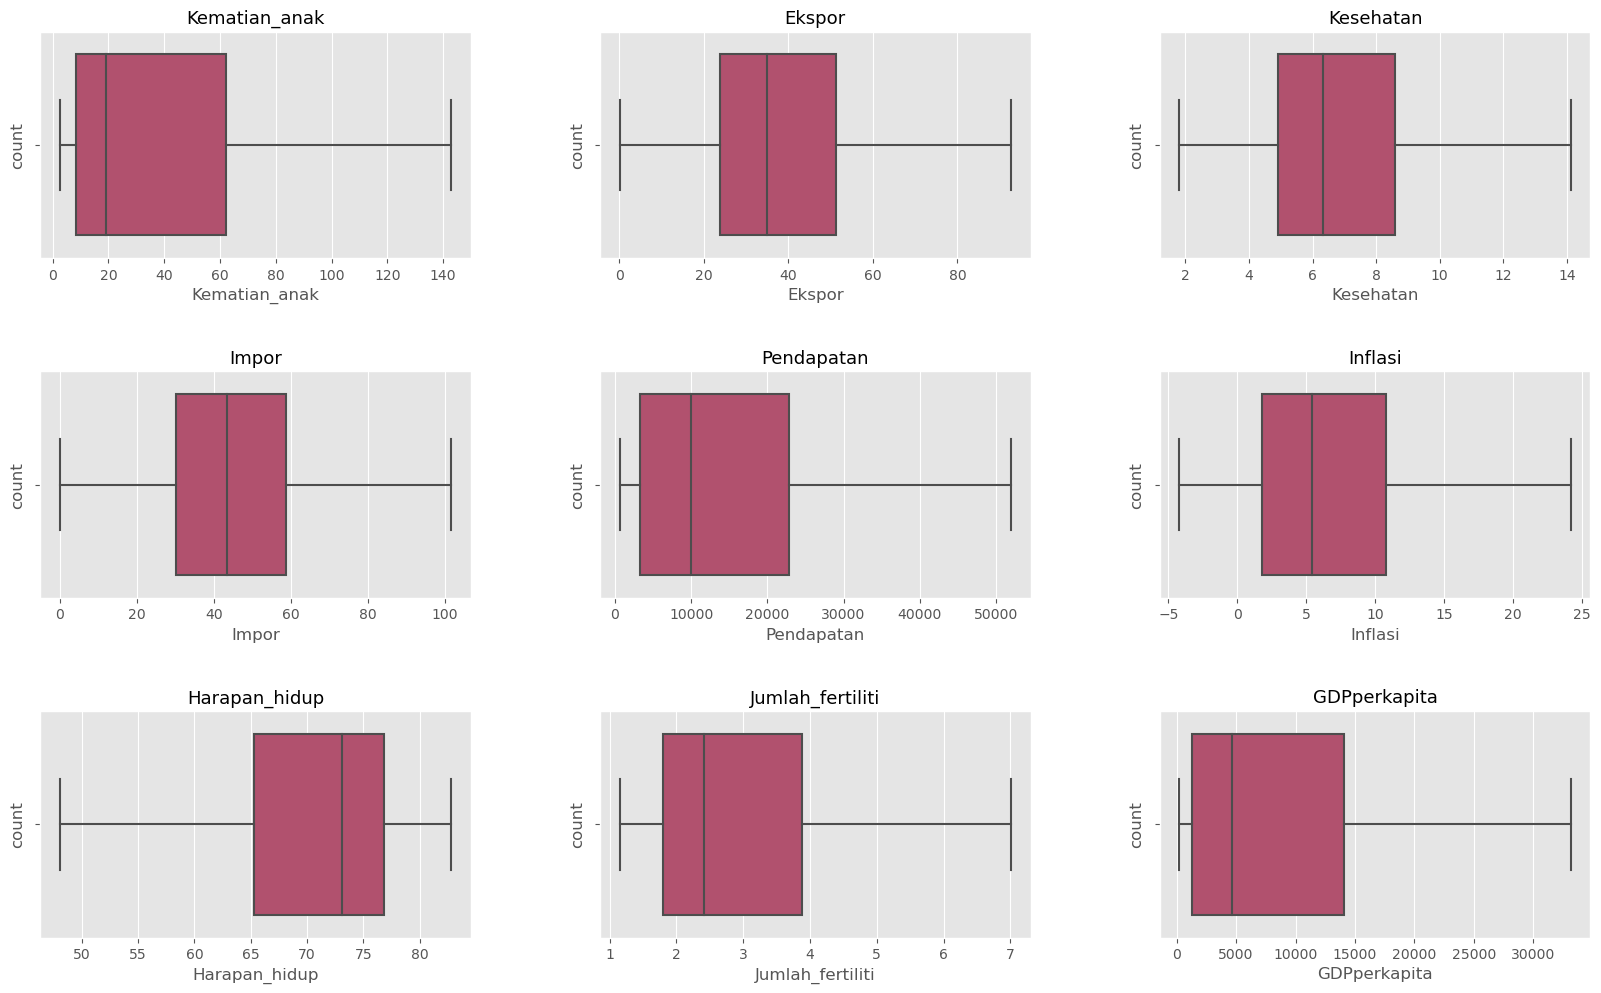

In [24]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
plt.figure(figsize =(20,25))
for i, col in enumerate(num_cols):
    plt.subplot(6,3,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel(f"skew of {col}:{skew(df[col])}")
    plt.ylabel("count",fontsize=12)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.boxplot(data=df, x=col, palette='flare', fliersize=1)

# G. Scalling Data

Pada projek ini digunakan 3 teknik data scaler yaitu MinMax Scaler, Robust Scaler dan Standard Scaler untuk dibandingkan hasilnya dan akan dipilih teknik yang menghasilkan score paling optimal

In [25]:
df['Negara'] = df['Negara'].apply(lambda x: isinstance(x,float) ).any()

### MinMax Scaler

In [26]:
MM_scaler = MinMaxScaler().fit_transform(df)

In [27]:
MM_scaler_df = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)
MM_scaler_df.head()

Negara  Kematian_anak    Ekspor  Kesehatan     Impor  Pendapatan   Inflasi  \
0     0.0       0.624488  0.106853   0.468725  0.441676    0.019490  0.481142   
1     0.0       0.099804  0.301309   0.385053  0.478126    0.181489  0.306662   
2     0.0       0.176083  0.413662   0.191714  0.308683    0.239318  0.715897   
3     0.0       0.829799  0.671856   0.084484  0.421973    0.103021  0.937963   
4     0.0       0.054892  0.490364   0.342811  0.579594    0.360038  0.199154   

   Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
0       0.234532          0.797268      0.009788  
1       0.812950          0.085361      0.117298  
2       0.818705          0.297055      0.128545  
3       0.346763          0.855314      0.100277  
4       0.827338          0.167307      0.363810

In [28]:
MM_scaler_df.describe().T

count      mean       std  min       25%       50%  \
Negara            167.0  0.000000  0.000000  0.0  0.000000  0.000000   
Kematian_anak     167.0  0.250210  0.274057  0.0  0.040278  0.119052   
Ekspor            167.0  0.426016  0.230120  0.0  0.255936  0.376931   
Kesehatan         167.0  0.404758  0.216743  0.0  0.252640  0.366369   
Impor             167.0  0.451153  0.200364  0.0  0.296861  0.425914   
Pendapatan        167.0  0.298151  0.296099  0.0  0.053467  0.182073   
Inflasi           167.0  0.397429  0.236340  0.0  0.212196  0.338386   
Harapan_hidup     167.0  0.650756  0.245253  0.0  0.496403  0.720863   
Jumlah_fertiliti  167.0  0.306458  0.257032  0.0  0.110115  0.215109   
GDPperkapita      167.0  0.307617  0.352960  0.0  0.033405  0.134624   

                       75%  max  
Negara            0.000000  0.0  
Kematian_anak     0.424167  1.0  
Ekspor            0.553562  1.0  
Kesehatan         0.551584  1.0  
Impor             0.578117  1.0  
Pendapatan        0.432080  1.0  
Inflasi           0.527318  1.0  
Harapan_hidup     0.827338  1.0  
Jumlah_fertiliti  0.466069  1.0  
GDPperkapita      0.420043  1.0

### Robust Scaller

In [29]:
RB_scaler = RobustScaler().fit_transform(df)

In [30]:
RB_scaler_df = pd.DataFrame(RobustScaler().fit_transform(df), columns=df.columns)
RB_scaler_df.head()

Negara  Kematian_anak    Ekspor  Kesehatan     Impor  Pendapatan   Inflasi  \
0     0.0       1.316620 -0.907441   0.342391  0.056042   -0.429416  0.453020   
1     0.0      -0.050139 -0.254083   0.062500  0.185639   -0.001543 -0.100671   
2     0.0       0.148561  0.123412  -0.584239 -0.416813    0.151196  1.197987   
3     0.0       1.851439  0.990926  -0.942935 -0.014011   -0.208794  1.902685   
4     0.0      -0.167131  0.381125  -0.078804  0.546410    0.470044 -0.441834   

   Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
0      -1.469565          1.635492     -0.322877  
1       0.278261         -0.364508     -0.044811  
2       0.295652          0.230216     -0.015723  
3      -1.130435          1.798561     -0.088836  
4       0.321739         -0.134293      0.592767

In [31]:
RB_scaler_df.describe().T

count      mean       std       min       25%  50%  \
Negara            167.0  0.000000  0.000000  0.000000  0.000000  0.0   
Kematian_anak     167.0  0.341657  0.713896 -0.310121 -0.205200  0.0   
Ekspor            167.0  0.164920  0.773188 -1.266461 -0.406534  0.0   
Kesehatan         167.0  0.128417  0.725028 -1.225543 -0.380435  0.0   
Impor             167.0  0.089740  0.712393 -1.514329 -0.458844  0.0   
Pendapatan        167.0  0.306587  0.782062 -0.480895 -0.339676  0.0   
Inflasi           167.0  0.187368  0.749996 -1.073826 -0.400447  0.0   
Harapan_hidup     167.0 -0.211846  0.741090 -2.178261 -0.678261  0.0   
Jumlah_fertiliti  167.0  0.256631  0.722093 -0.604317 -0.294964  0.0   
GDPperkapita      167.0  0.447428  0.912897 -0.348192 -0.261792  0.0   

                       75%       max  
Negara            0.000000  0.000000  
Kematian_anak     0.794800  2.294800  
Ekspor            0.593466  2.093466  
Kesehatan         0.619565  2.119565  
Impor             0.541156  2.041156  
Pendapatan        0.660324  2.160324  
Inflasi           0.599553  2.099553  
Harapan_hidup     0.321739  0.843478  
Jumlah_fertiliti  0.705036  2.205036  
GDPperkapita      0.738208  2.238208

### Standard Scaller

In [32]:
SS_scaler = StandardScaler().fit_transform(df)

In [33]:
SS_scaler_df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
SS_scaler_df.head()

Negara  Kematian_anak    Ekspor  Kesehatan     Impor  Pendapatan   Inflasi  \
0     0.0       1.369802 -1.391107   0.296013 -0.047444   -0.943936  0.355270   
1     0.0      -0.550464 -0.543547  -0.091190  0.135021   -0.395181 -0.385208   
2     0.0      -0.271295 -0.053846  -0.985893 -0.713196   -0.199291  1.351551   
3     0.0       2.121210  1.071524  -1.482114 -0.146074   -0.660984  2.293979   
4     0.0      -0.714835  0.280469  -0.286671  0.642965    0.209637 -0.841463   

   Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
0      -1.702225          1.915276     -0.846341  
1       0.663321         -0.862779     -0.540827  
2       0.686859         -0.036691     -0.508868  
3      -1.243238          2.141784     -0.589198  
4       0.722166         -0.543003      0.159686

In [34]:
SS_scaler_df.describe().T

count          mean       std       min       25%       50%  \
Negara            167.0  0.000000e+00  0.000000  0.000000  0.000000  0.000000   
Kematian_anak     167.0 -3.058099e-17  1.003008 -0.915732 -0.768320 -0.480020   
Ekspor            167.0  1.378638e-16  1.003008 -1.856841 -0.741311 -0.213941   
Kesehatan         167.0  1.532374e-16  1.003008 -1.873076 -0.703948 -0.177653   
Impor             167.0  1.349553e-16  1.003008 -2.258436 -0.772374 -0.126348   
Pendapatan        167.0 -2.858658e-17  1.003008 -1.009958 -0.828842 -0.393202   
Inflasi           167.0 -9.307259e-18  1.003008 -1.686656 -0.786114 -0.250576   
Harapan_hidup     167.0  8.934969e-16  1.003008 -2.661389 -0.631256  0.286717   
Jumlah_fertiliti  167.0  3.603239e-16  1.003008 -1.195879 -0.766180 -0.356467   
GDPperkapita      167.0  1.396089e-17  1.003008 -0.874154 -0.779227 -0.491593   

                       75%       max  
Negara            0.000000  0.000000  
Kematian_anak     0.636657  2.744123  
Ekspor            0.555926  2.501781  
Kesehatan         0.679457  2.754565  
Impor             0.635567  2.747480  
Pendapatan        0.453674  2.377449  
Inflasi           0.551236  2.557260  
Harapan_hidup     0.722166  1.428299  
Jumlah_fertiliti  0.622847  2.706389  
GDPperkapita      0.319482  1.967546

# H. PCA

set parameter n_components = 0.9, yang berarti bahwa PCA secara otomatis akan menghasilkan cukup banyak principal component yang akan mempertahankan 90% varians dalam dataset.

In [35]:
pca = PCA(n_components=0.9, random_state=42)

### MinMax Scaller

In [36]:
pca_MM = pca.fit(MM_scaler)
pc_MM = ['PC'+str(n) for n in range(1, len(pca_MM.components_)+1)]
df_pca_MM = pd.DataFrame(pca_MM.transform(MM_scaler), columns=pc_MM)

In [37]:
df_pca_MM.head()

PC1       PC2       PC3       PC4
0 -0.828750 -0.239834 -0.045052 -0.247512
1  0.030136  0.255057 -0.276633  0.145215
2 -0.118539 -0.001744  0.037725  0.449075
3 -0.820331 -0.275233  0.687311  0.108067
4  0.293014  0.227075 -0.048907 -0.001048

In [38]:
pca_MM.components_

array([[-0.        , -0.39280892,  0.18601108,  0.12231095,  0.04518469,
         0.45888133, -0.16762703,  0.36752666, -0.3518504 ,  0.54456768],
       [ 0.        , -0.30670792,  0.35467669, -0.10393836,  0.51539674,
        -0.31470948, -0.27509303,  0.09032543, -0.33356564, -0.45777153],
       [-0.        ,  0.24236923,  0.64784214, -0.36875436,  0.29610274,
         0.27354714,  0.32640922, -0.17694969,  0.24465407,  0.15925855],
       [-0.        , -0.32450139, -0.05451669, -0.5140404 , -0.37297661,
        -0.02945015,  0.56179434,  0.247594  , -0.26050543, -0.20671631]])

In [39]:
pca_MM.explained_variance_ratio_

array([0.56988513, 0.12182811, 0.110543  , 0.10208348])

In [40]:
sum(pca_MM.explained_variance_ratio_)

0.9043397332606273

In [41]:
data_pca_MM = pd.DataFrame(pca_MM.components_,
                           columns = df.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3', 'Component 4'])
data_pca_MM

Negara  Kematian_anak    Ekspor  Kesehatan     Impor  Pendapatan  \
Component 1    -0.0      -0.392809  0.186011   0.122311  0.045185    0.458881   
Component 2     0.0      -0.306708  0.354677  -0.103938  0.515397   -0.314709   
Component 3    -0.0       0.242369  0.647842  -0.368754  0.296103    0.273547   
Component 4    -0.0      -0.324501 -0.054517  -0.514040 -0.372977   -0.029450   

              Inflasi  Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
Component 1 -0.167627       0.367527         -0.351850      0.544568  
Component 2 -0.275093       0.090325         -0.333566     -0.457772  
Component 3  0.326409      -0.176950          0.244654      0.159259  
Component 4  0.561794       0.247594         -0.260505     -0.206716

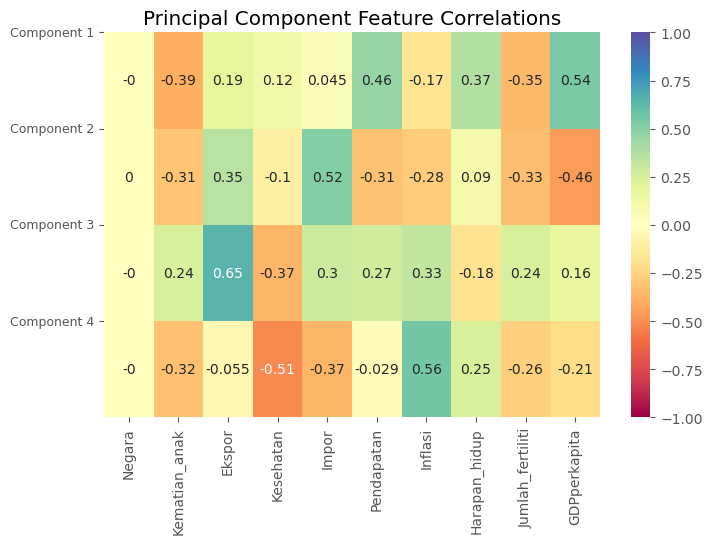

In [42]:
#Kita dapat membuat heatmap lain untuk membuat grafik komponen:

plt.figure(figsize=(8,5))
sns.heatmap(data_pca_MM, vmin=-1, vmax=1, cmap='Spectral', annot=True)
plt.title('Principal Component Feature Correlations')
plt.yticks([0, 1, 2, 3], ['Component 1', 'Component 2', 'Component 3', 'Component 4'],rotation=0, fontsize=9)
plt.show()

In [43]:
pca_MM_scores = pca.transform(MM_scaler)
pca_MM_scores

array([[-8.28749753e-01, -2.39833919e-01, -4.50518474e-02,
        -2.47511511e-01],
       [ 3.01360347e-02,  2.55056706e-01, -2.76632613e-01,
         1.45215131e-01],
       [-1.18539150e-01, -1.74434529e-03,  3.77251335e-02,
         4.49075197e-01],
       [-8.20331255e-01, -2.75232631e-01,  6.87310865e-01,
         1.08066577e-01],
       [ 2.93013939e-01,  2.27074563e-01, -4.89068555e-02,
        -1.04750972e-03],
       [ 5.42732197e-02, -2.95399540e-01, -1.87279401e-01,
         4.55815734e-01],
       [-1.08136220e-01,  2.15604888e-01, -2.36383464e-01,
         2.97007035e-01],
       [ 8.81044071e-01, -4.75364922e-01, -2.47963468e-01,
        -5.02086256e-02],
       [ 1.01161940e+00, -2.20403921e-01, -2.44429473e-02,
        -2.56844340e-01],
       [-6.35516984e-02, -1.54986566e-02,  8.10252617e-02,
         3.14511815e-01],
       [ 5.64633408e-01, -1.31472321e-01, -1.36767645e-01,
        -1.71901371e-01],
       [ 6.23459648e-01, -2.39683398e-02,  3.57225167e-01,
      

### Robust Scaler

In [44]:
pca_RB = pca.fit(RB_scaler)
pc_RB = ['PC'+str(n) for n in range(1, len(pca_RB.components_)+1)]
df_pca_RB = pd.DataFrame(pca_RB.transform(RB_scaler), columns=pc_RB)

In [45]:
df_pca_RB.head()

PC1       PC2       PC3       PC4       PC5
0 -2.355990 -0.370055 -0.602810  0.754698  0.020018
1  0.146714 -0.113211 -0.357330 -1.075147  0.056649
2 -0.385463 -0.284236  1.175927 -0.675482  0.342287
3 -2.313197  0.840344  1.733418  1.226005  0.149237
4  0.878983  0.423855 -0.236092 -0.512380 -0.319918

In [46]:
pca_RB.components_

array([[ 0.        , -0.37326012,  0.2422269 ,  0.15449876,  0.08387678,
         0.43009124, -0.2083581 ,  0.40237919, -0.36256448,  0.49934382],
       [-0.        ,  0.02915842,  0.64526479, -0.19938836,  0.6862093 ,
        -0.09098217, -0.08944994, -0.12426477,  0.00356865, -0.20102413],
       [ 0.        , -0.03170886,  0.27696658, -0.61350206, -0.28242737,
         0.22112366,  0.63332922,  0.0804172 ,  0.01276705,  0.09748111],
       [-0.        ,  0.44356307,  0.1694054 ,  0.30572457,  0.05204078,
         0.35460209,  0.09954727, -0.30089576,  0.47873161,  0.47223229],
       [-0.        , -0.19426956,  0.02627776,  0.60548563,  0.20918201,
        -0.09168812,  0.70660796,  0.07955784, -0.11534002, -0.15448157]])

In [47]:
pca_RB.explained_variance_ratio_

array([0.50627032, 0.15668752, 0.13007354, 0.0983234 , 0.06182044])

In [48]:
sum(pca_RB.explained_variance_ratio_)

0.9531752139208274

In [49]:
data_pca_RB = pd.DataFrame(pca_RB.components_,
                           columns = df.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5'])
data_pca_RB

Negara  Kematian_anak    Ekspor  Kesehatan     Impor  Pendapatan  \
Component 1     0.0      -0.373260  0.242227   0.154499  0.083877    0.430091   
Component 2    -0.0       0.029158  0.645265  -0.199388  0.686209   -0.090982   
Component 3     0.0      -0.031709  0.276967  -0.613502 -0.282427    0.221124   
Component 4    -0.0       0.443563  0.169405   0.305725  0.052041    0.354602   
Component 5    -0.0      -0.194270  0.026278   0.605486  0.209182   -0.091688   

              Inflasi  Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
Component 1 -0.208358       0.402379         -0.362564      0.499344  
Component 2 -0.089450      -0.124265          0.003569     -0.201024  
Component 3  0.633329       0.080417          0.012767      0.097481  
Component 4  0.099547      -0.300896          0.478732      0.472232  
Component 5  0.706608       0.079558         -0.115340     -0.154482

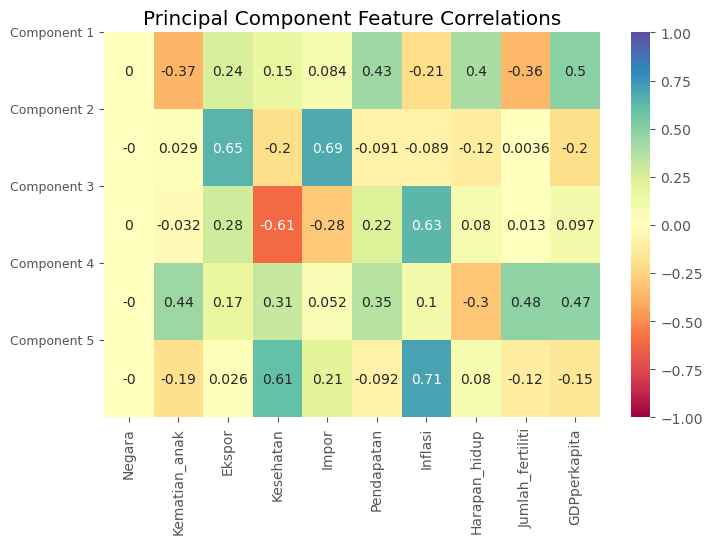

In [50]:
#Kita dapat membuat heatmap lain untuk membuat grafik komponen:

plt.figure(figsize=(8,5))
sns.heatmap(data_pca_RB, vmin=-1, vmax=1, cmap='Spectral', annot=True)
plt.title('Principal Component Feature Correlations')
plt.yticks([0, 1, 2, 3, 4], ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5'],rotation=0, fontsize=9)
plt.show()

In [51]:
pca_RB_scores = pca.transform(RB_scaler)
pca_RB_scores

array([[-2.35599001, -0.37005504, -0.60281029,  0.75469825,  0.02001793],
       [ 0.14671397, -0.11321079, -0.35733016, -1.07514735,  0.05664937],
       [-0.38546281, -0.28423578,  1.17592653, -0.67548181,  0.3422865 ],
       [-2.31319715,  0.84034394,  1.73341833,  1.22600494,  0.14923653],
       [ 0.87898283,  0.42385543, -0.23609218, -0.5123801 , -0.3199177 ],
       [-0.03683209, -1.49175073,  0.92726309, -0.32745004,  1.20868584],
       [-0.32091104, -0.21533087,  0.1287109 , -1.25869615, -0.07147969],
       [ 2.230989  , -1.72953507, -0.1361437 ,  0.43792905, -0.49320127],
       [ 2.76496725, -0.45864778, -0.47706696,  0.82149219,  0.09479061],
       [-0.20169606, -0.19021746,  0.97474067, -0.30407882,  0.30677671],
       [ 1.48484352, -0.50347604, -0.49162096,  0.23066738, -0.50839619],
       [ 1.68101384,  0.56159607,  0.99700252,  0.32993891, -0.26384089],
       [-1.07500622, -0.73038078,  0.31290041, -1.09961313, -0.56122111],
       [ 0.99924594, -0.09543189, -0.6

### Standard Scaller

In [52]:
pca_SS = pca.fit(SS_scaler)
pc_SS = ['PC'+str(n) for n in range(1, len(pca_SS.components_)+1)]
df_pca_SS = pd.DataFrame(pca_SS.transform(SS_scaler), columns=pc_SS)

In [53]:
df_pca_SS.head()

PC1       PC2       PC3       PC4       PC5
0 -3.177917 -0.251292 -1.011474  0.778804 -0.014102
1  0.434979 -0.218700 -0.292591 -1.391241  0.156711
2 -0.416784 -0.613870  1.637859 -0.615021  0.536604
3 -3.306409  1.066649  2.151219  1.698677  0.160551
4  1.253246  0.547778 -0.136955 -0.716890 -0.394628

In [54]:
pca_SS.components_

array([[ 0.        , -0.41944273,  0.24261558,  0.16500907,  0.10420163,
         0.40941528, -0.2225263 ,  0.42682192, -0.40453015,  0.4051655 ],
       [-0.        ,  0.07334822,  0.58841114, -0.14688671,  0.74003398,
        -0.09869075, -0.12425025, -0.16188848,  0.04426836, -0.16068855],
       [ 0.        , -0.08450172,  0.31511283, -0.68295534, -0.22321331,
         0.17709816,  0.57516657,  0.10807604, -0.04597193,  0.03656493],
       [-0.        ,  0.38752364,  0.21044073,  0.31288648, -0.01700475,
         0.44799707,  0.2127039 , -0.20810598,  0.43950031,  0.47427847],
       [ 0.        , -0.22293271,  0.00638424,  0.54492556,  0.21137615,
        -0.14599624,  0.72370141,  0.07904136, -0.14305882, -0.19200134]])

In [55]:
pca_SS.explained_variance_ratio_

array([0.48892383, 0.16452848, 0.13756787, 0.09504553, 0.0650032 ])

In [56]:
sum(pca_SS.explained_variance_ratio_)

0.9510689160372022

In [57]:
data_pca_SS = pd.DataFrame(pca_SS.components_,
                           columns = df.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5'])
data_pca_SS

Negara  Kematian_anak    Ekspor  Kesehatan     Impor  Pendapatan  \
Component 1     0.0      -0.419443  0.242616   0.165009  0.104202    0.409415   
Component 2    -0.0       0.073348  0.588411  -0.146887  0.740034   -0.098691   
Component 3     0.0      -0.084502  0.315113  -0.682955 -0.223213    0.177098   
Component 4    -0.0       0.387524  0.210441   0.312886 -0.017005    0.447997   
Component 5     0.0      -0.222933  0.006384   0.544926  0.211376   -0.145996   

              Inflasi  Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
Component 1 -0.222526       0.426822         -0.404530      0.405166  
Component 2 -0.124250      -0.161888          0.044268     -0.160689  
Component 3  0.575167       0.108076         -0.045972      0.036565  
Component 4  0.212704      -0.208106          0.439500      0.474278  
Component 5  0.723701       0.079041         -0.143059     -0.192001

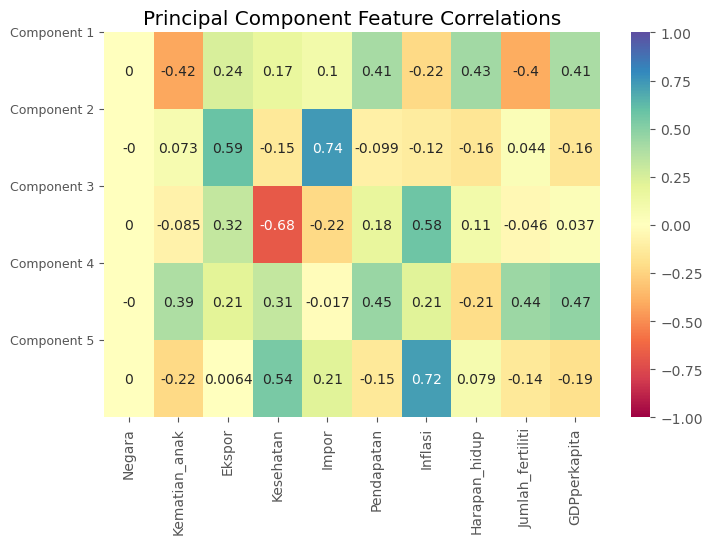

In [58]:
#Kita dapat membuat heatmap lain untuk membuat grafik komponen:

plt.figure(figsize=(8,5))
sns.heatmap(data_pca_SS, vmin=-1, vmax=1, cmap='Spectral', annot=True)
plt.title('Principal Component Feature Correlations')
plt.yticks([0, 1, 2, 3, 4], ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5'],rotation=0, fontsize=9)
plt.show()

In [59]:
pca_SS_scores = pca.transform(SS_scaler)
pca_SS_scores

array([[-3.17791739e+00, -2.51291807e-01, -1.01147443e+00,
         7.78803595e-01, -1.41022495e-02],
       [ 4.34978909e-01, -2.18700436e-01, -2.92590675e-01,
        -1.39124146e+00,  1.56711346e-01],
       [-4.16783953e-01, -6.13869574e-01,  1.63785860e+00,
        -6.15021493e-01,  5.36603860e-01],
       [-3.30640928e+00,  1.06664902e+00,  2.15121921e+00,
         1.69867748e+00,  1.60550529e-01],
       [ 1.25324554e+00,  5.47778085e-01, -1.36955092e-01,
        -7.16889756e-01, -3.94628179e-01],
       [-2.86331783e-02, -2.16769200e+00,  1.04348335e+00,
        -3.42502164e-02,  1.65971957e+00],
       [-2.02343083e-01, -3.86555635e-01,  3.87940790e-01,
        -1.63906854e+00,  3.98966166e-02],
       [ 2.65113941e+00, -2.24611465e+00, -4.06301168e-01,
         6.43814169e-01, -7.38102424e-01],
       [ 3.41037290e+00, -5.10214852e-01, -8.24463487e-01,
         1.13265715e+00,  4.03642881e-03],
       [-2.16017878e-01, -5.19685146e-01,  1.30455864e+00,
        -1.54867718e-01

# I. Clustering

### n-clusters (Elbow Method)

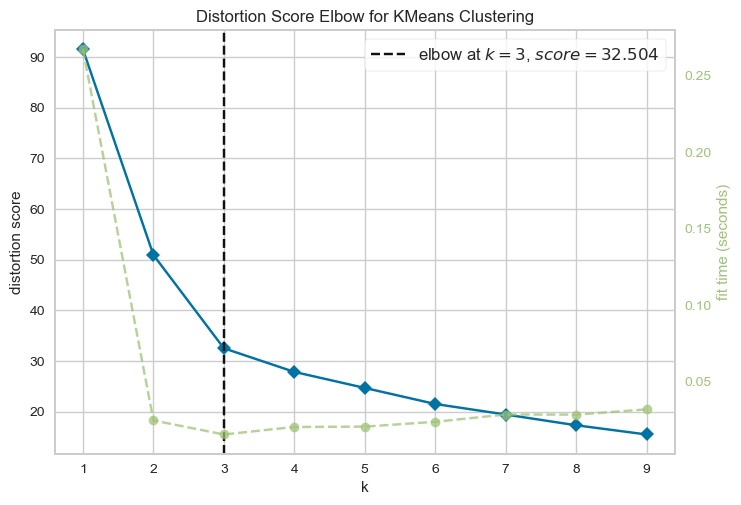

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)

# Elbow Method using MinMax Scaler dataframe
visualizer_MM = KElbowVisualizer(model, k=(1,10))
visualizer_MM.fit(df_pca_MM)
visualizer_MM.show()

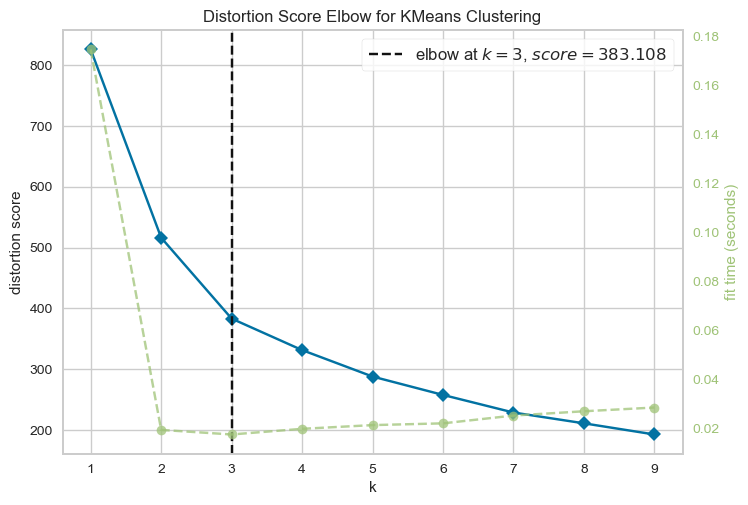

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
# Elbow Method using RobustScaler dataframe
visualizer_RB = KElbowVisualizer(model, k=(1,10))
visualizer_RB.fit(df_pca_RB)
visualizer_RB.show()

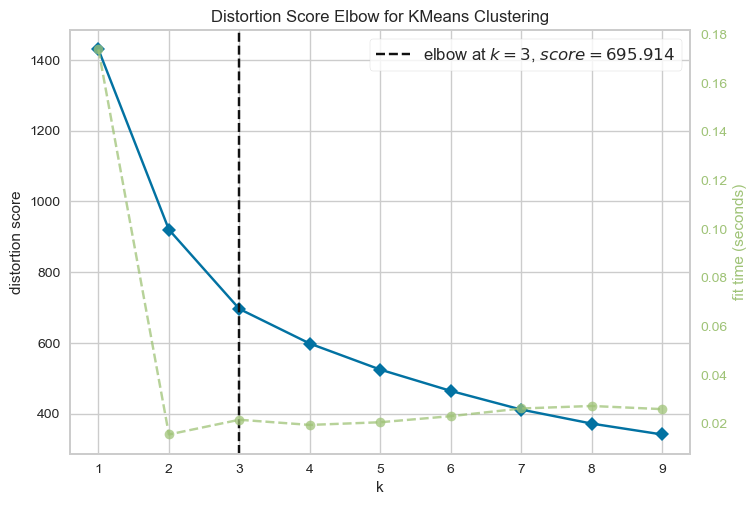

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
# Elbow Method using StandardScaler dataframe
visualizer_SS = KElbowVisualizer(model, k=(1,10))
visualizer_SS.fit(df_pca_SS)
visualizer_SS.show()

dari hasil visualisasi diatas masing masing akan dilakukan percobaan dengan nilai k yang berbeda untuk mendapatkan hasil cluster yang optimal

### K-Means Clustering

In [65]:
# create model Kmeans using dataframe Minmaxscaler
model_Kmeans_MM = KMeans(visualizer_MM.elbow_value_, init='k-means++', random_state=42)
labels_MM = model_Kmeans_MM.fit_predict(df_pca_MM)

In [66]:
# create model Kmeans using dataframe Robustscaler
model_Kmeans_RB = KMeans(visualizer_RB.elbow_value_, init='k-means++', random_state=42)
labels_RB = model_Kmeans_RB.fit_predict(df_pca_RB)

In [67]:
# create model Kmeans using dataframe Standardscaler
model_Kmeans_SS = KMeans(visualizer_SS.elbow_value_,init='k-means++', random_state=42)
labels_SS = model_Kmeans_SS.fit_predict(df_pca_SS)

In [68]:
MM_scaler_df['LABELS'] = labels_MM
df_pca_MM['LABELS'] = labels_MM

RB_scaler_df['LABELS'] = labels_RB
df_pca_RB['LABELS'] = labels_RB

SS_scaler_df['LABELS'] = labels_SS
df_pca_SS['LABELS'] = labels_SS

### Distribution of Data

#### MinMax Scaler

<AxesSubplot:title={'center':'Using MinMax Scaler'}, ylabel='LABELS'>

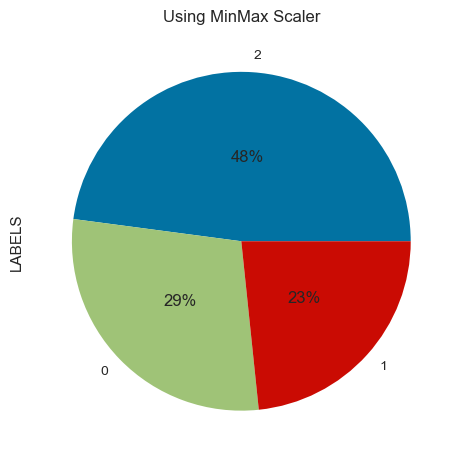

In [69]:
df_pca_MM.LABELS.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1, 
                                         title="Using MinMax Scaler")

#### Robust Scaler

<AxesSubplot:title={'center':'Using RobustScaler'}, ylabel='LABELS'>

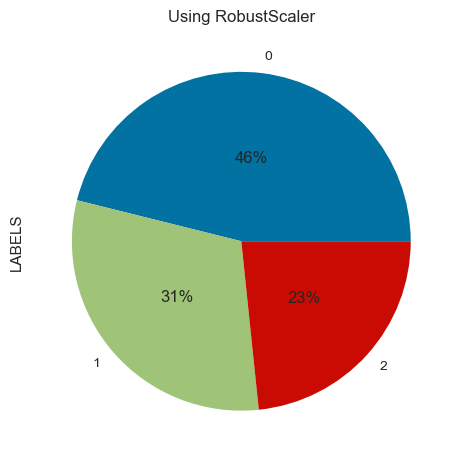

In [70]:
df_pca_RB.LABELS.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.5, 
                                         labeldistance=1.1, title="Using RobustScaler")

#### Standard Scaller

<AxesSubplot:title={'center':'Using StandardScaler'}, ylabel='LABELS'>

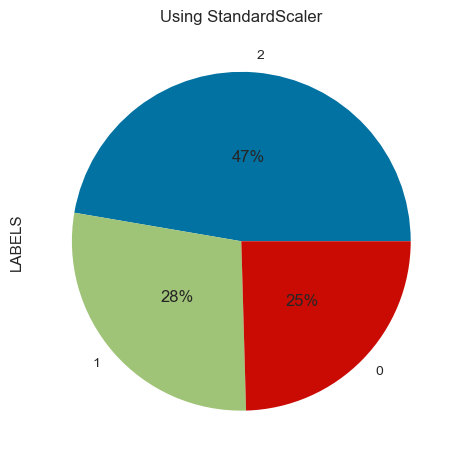

In [71]:
df_pca_SS.LABELS.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1, title="Using StandardScaler")

# J. Evaluation

## Scalling Data Method

* Semakin kecil nilai DaviesBouldin Index (DBI) yang diperoleh (non-negatif >= 0), maka semakin baik cluster yang diperoleh dari pengelompokan menggunakan algoritma clustering (Bates & Kalita 2016)
* Silhouette Coefficient sebuah nilai antara -1 dan 1. Semakin tinggi scorenya, semakin baik. score 1 mengindikasikan cluster yang kuat dan 0 berarti overlapping cluster.

In [72]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

print("=========================MinMaxScaler============================")
print(f'Davies-Bouldin index = {davies_bouldin_score(df_pca_MM, labels_MM)}')
print(f'Silhouette Score = {silhouette_score(df_pca_MM, labels_MM)}')
print("=========================================================================\n")

print("=========================RobustScaler============================")
print(f'Davies-Bouldin index = {davies_bouldin_score(df_pca_RB, labels_RB)}')
print(f'Silhouette Score = {silhouette_score(df_pca_RB, labels_RB)}')
print("========================================================================\n")

print("=========================StandardScaler============================")
print(f'Davies-Bouldin index = {davies_bouldin_score(df_pca_SS, labels_SS)}')
print(f'Silhouette Score = {silhouette_score(df_pca_SS, labels_SS)}')
print("========================================================================\n")

=========================MinMaxScaler============================
Davies-Bouldin index = 0.5559225117548406
Silhouette Score = 0.6419815432749046

=========================RobustScaler============================
Davies-Bouldin index = 1.0443142344152034
Silhouette Score = 0.3815286101446988

=========================StandardScaler============================
Davies-Bouldin index = 1.1132919855811132
Silhouette Score = 0.34944826077858504



Dari hasil score diatas terlihat jelas bahwa melakukan fitur scaling menggunakan MinMaxScaler menghasilkan hasil cluster yang optimal, hal itu dibuktikan dengan score DBI paling rendah diantara yang lain dengan score 0.56 dimana untuk score DBI semakin mendekati nol maka semakin baik cluster tersebut. selain itu dilihat dari Silhouette Score memiliki nilai yang lebih tinggi dibanding dengan yang lain dengan nilai 0.64, untuk Silhouette Score semakin mendekati nilai 1 maka semakin baik pula hasil cluster yang telah terbentuk.

### PCA

In [78]:
def plotting(data, title):
    mean = data.groupby("LABELS").mean().to_numpy()
    name_cols = data.columns[0:-1]
    lines_plot = np.linspace(start=0, stop=2 * np.pi, num=len(name_cols))
    cat = np.arange(0, len(mean))
    plt.figure(figsize=(10,10))
    plt.subplot(polar=True)
    for i in range(len(mean)):
        plt.plot(lines_plot, mean[i], label=f'class {cat[i]}')
    plt.title(f'Feature comparison ({title})', size=20)
    lines, labels = plt.thetagrids(np.degrees(lines_plot), labels=name_cols)
    plt.legend()
    plt.show()

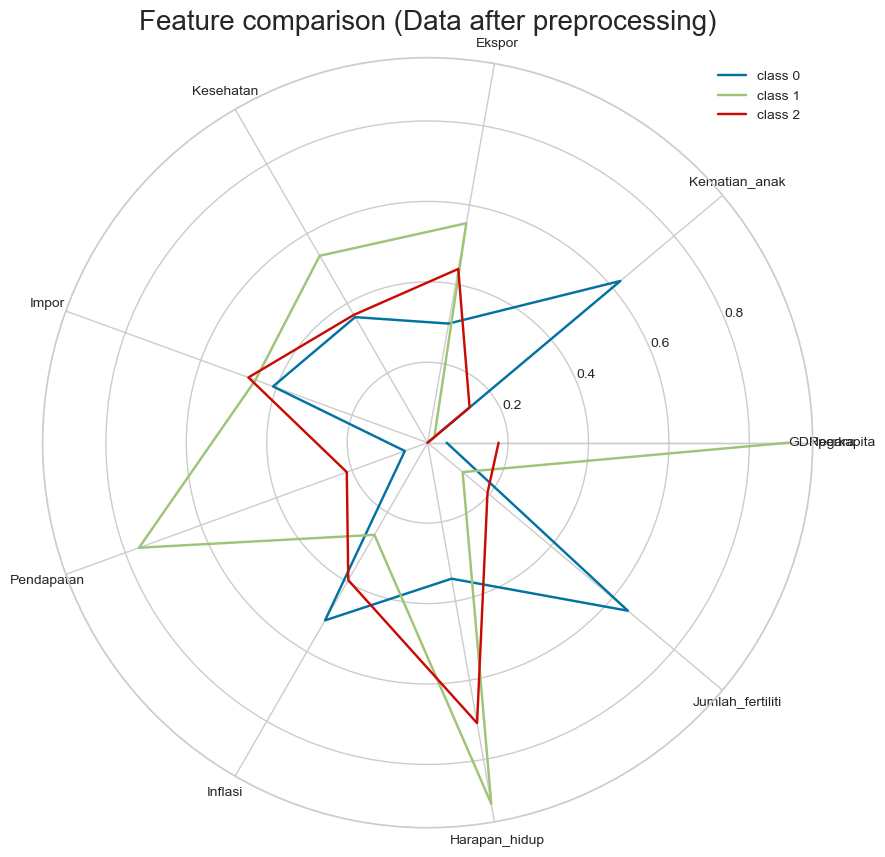

In [79]:
plotting(MM_scaler_df, 'Data after preprocessing')

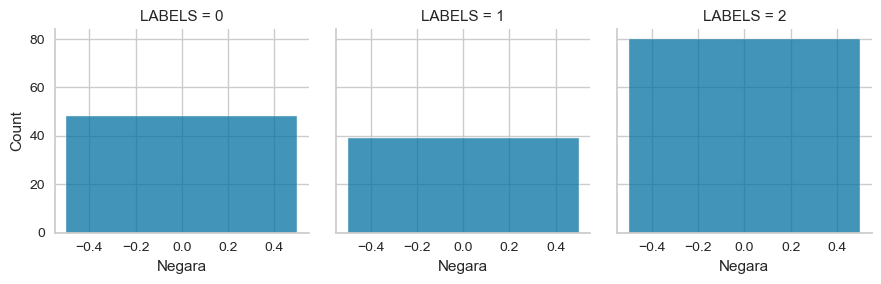

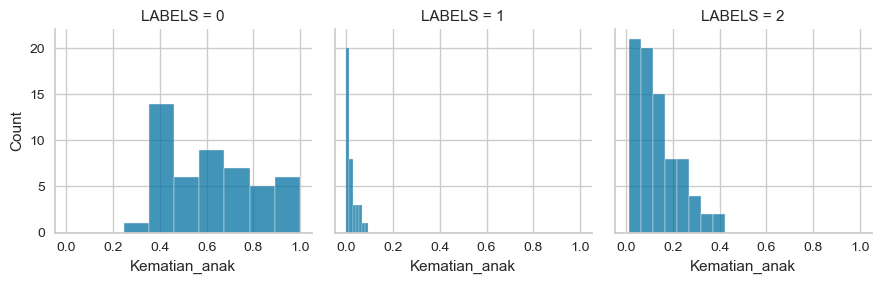

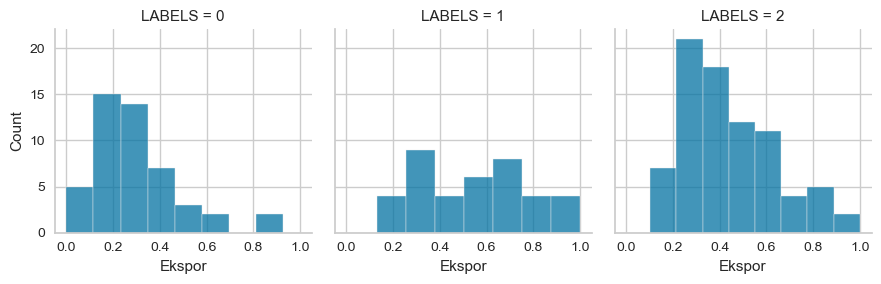

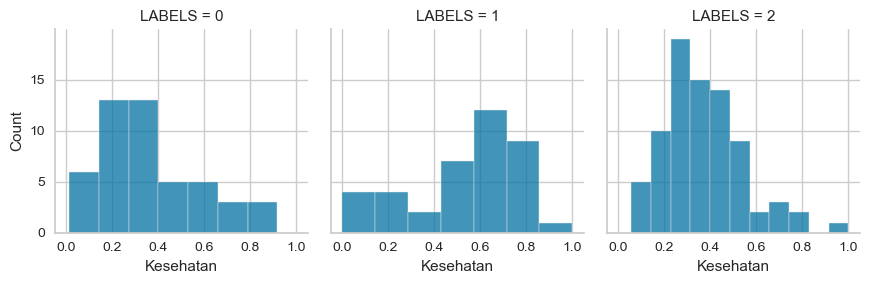

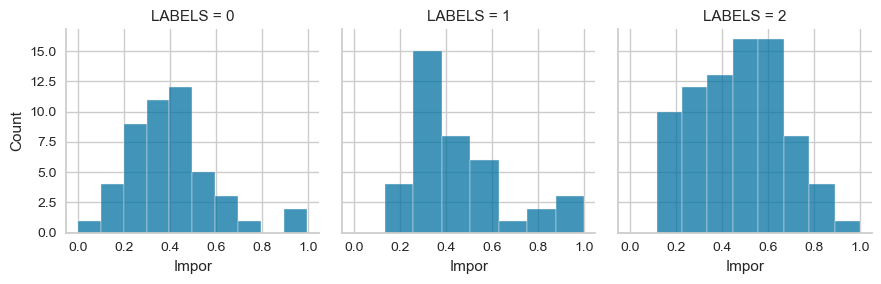

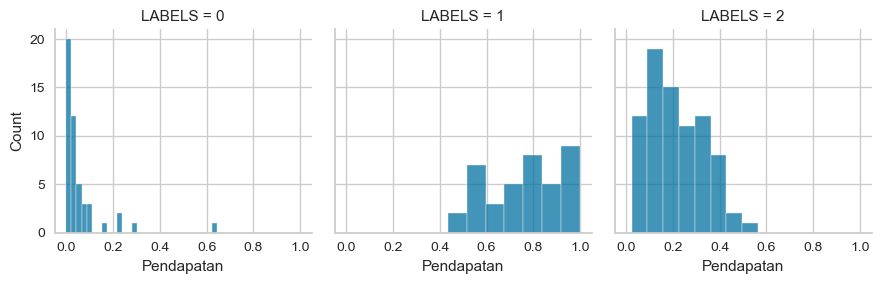

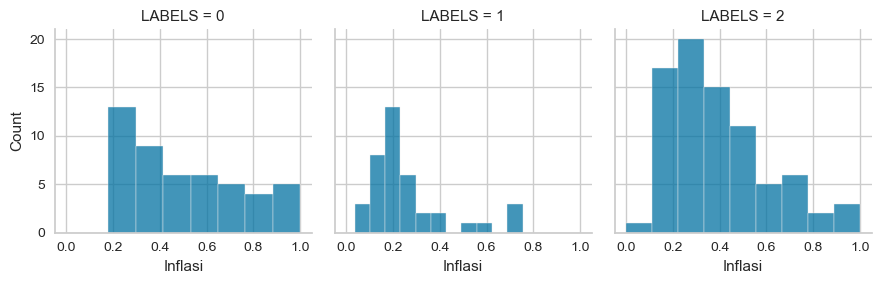

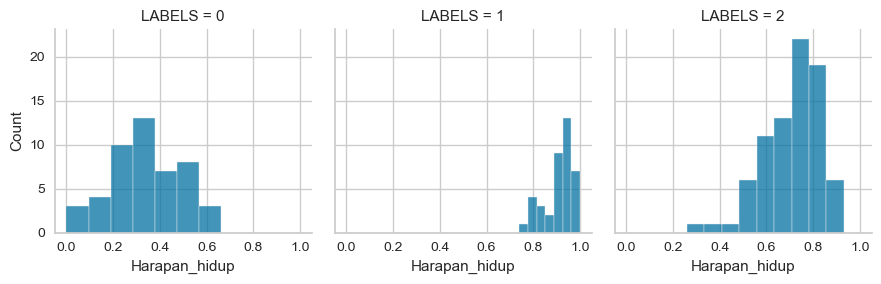

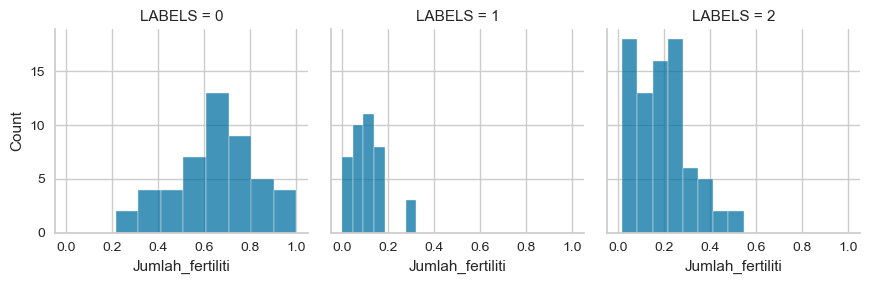

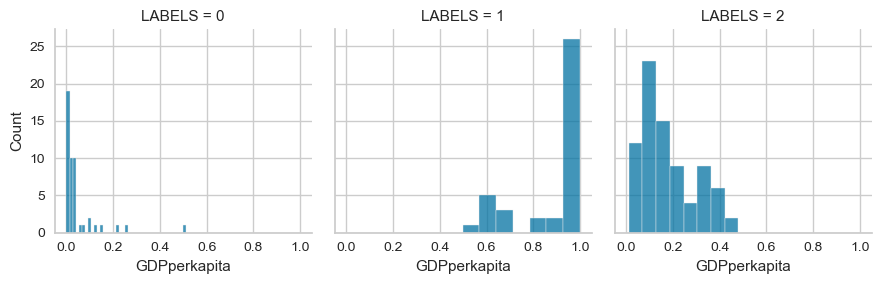

In [80]:
for x in MM_scaler_df.drop('LABELS', axis=1).columns:
    plot = sns.FacetGrid(MM_scaler_df, col='LABELS')
    plot.map(sns.histplot, x)

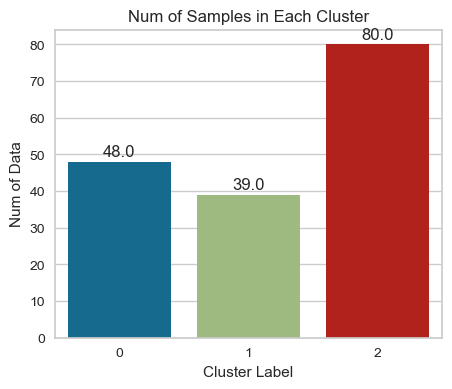

In [81]:
x = pd.Series(MM_scaler_df.LABELS).value_counts().sort_index().reset_index()
x.columns = ['Cluster Label', 'Num of Data']
plt.figure(figsize=(5,4))
plt.title("Num of Samples in Each Cluster")
ax = sns.barplot(data=x, x='Cluster Label', y='Num of Data')
for i in ax.patches:
        ax.annotate(format(i.get_height()), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center',va='center',xytext=(0,7), textcoords='offset points')

jumlah titik data pada cluster 0 sebesar 48, cluster 1 sebesar 39, dan cluster 2 sebesar 80

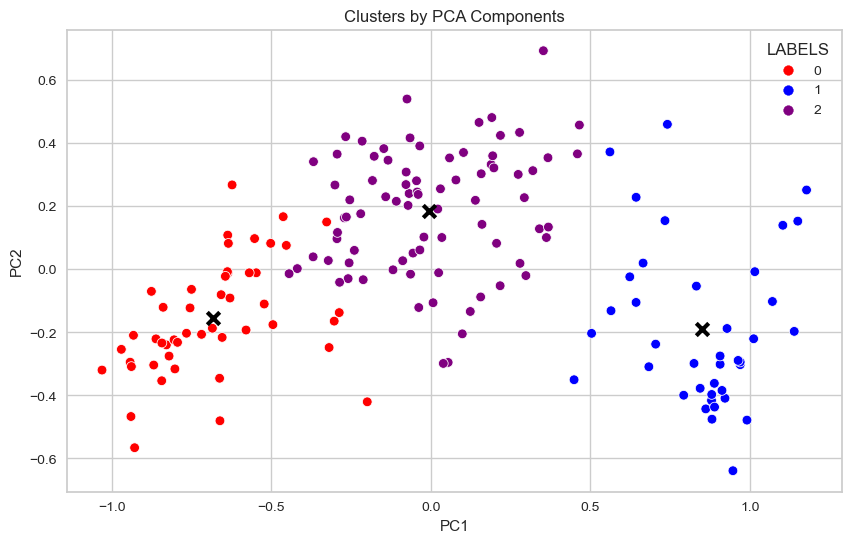

In [83]:
x_axis = df_pca_MM['PC1']
y_axis = df_pca_MM['PC2']
plt.figure(figsize=(10,6))
sns.scatterplot(x_axis, y_axis, hue=df_pca_MM['LABELS'], palette=['red','blue','purple'])
centroid = model_Kmeans_MM.cluster_centers_
plt.scatter(centroid[:, 0], centroid[:, 1],
            marker='x', s=80, linewidths=4,
            color='black', zorder=10,lw=3)
plt.title('Clusters by PCA Components')
plt.show()

### K-Means Clustering

In [84]:
data_pca_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(pca_MM_scores)], axis=1)
data_pca_kmeans.columns.values[-7:] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7']

data_pca_kmeans['K-Means PCA Segment'] = model_Kmeans_MM.labels_
data_pca_kmeans

Negara  Kematian_anak  Ekspor  Kesehatan  Impor  Pendapatan  Inflasi  \
0     False           90.2    10.0       7.58   44.9      1610.0     9.44   
1     False           16.6    28.0       6.55   48.6      9930.0     4.49   
2     False           27.3    38.4       4.17   31.4     12900.0    16.10   
3     False          119.0    62.3       2.85   42.9      5900.0    22.40   
4     False           10.3    45.5       6.03   58.9     19100.0     1.44   
..      ...            ...     ...        ...    ...         ...      ...   
162   False           29.2    46.6       5.25   52.7      2950.0     2.62   
163   False           17.1    28.5       4.91   17.6     16500.0    24.16   
164   False           23.3    72.0       6.84   80.2      4490.0    12.10   
165   False           56.3    30.0       5.18   34.4      4480.0    23.60   
166   False           83.1    37.0       5.89   30.9      3280.0    14.00   

     Component 1  Component 2  Component 3  Component 4  Component 5  \
0           56.2         5.82          553    -0.828750    -0.239834   
1           76.3         1.65         4090     0.030136     0.255057   
2           76.5         2.89         4460    -0.118539    -0.001744   
3           60.1         6.16         3530    -0.820331    -0.275233   
4           76.8         2.13        12200     0.293014     0.227075   
..           ...          ...          ...          ...          ...   
162         63.0         3.50         2970    -0.300509     0.267135   
163         75.4         2.47        13500     0.039113    -0.298633   
164         73.1         1.95         1310    -0.074712     0.539817   
165         67.5         4.67         1310    -0.579052    -0.192691   
166         52.0         5.40         1460    -0.793835    -0.231740   

     Component 6  Component 7  K-Means PCA Segment  
0      -0.045052    -0.247512                    0  
1      -0.276633     0.145215                    2  
2       0.037725     0.449075                    2  
3       0.687311     0.108067                    0  
4      -0.048907    -0.001048                    2  
..           ...          ...                  ...  
162     0.007097    -0.058696                    2  
163     0.032121     0.609889                    2  
164     0.200326     0.110725                    2  
165     0.153909     0.363588                    0  
166     0.211027    -0.052581                    0  

[167 rows x 15 columns]

Sekarang sudah memiliki kerangka data dengan fitur asli, jumlah komponen PCA yang tetap, dan label segmennya sesuai dengan pengelompokan KMeans yang diterapkan ke jumlah grup yang tetap.

In [85]:
#mengelompokkan berdasarkan segmen dan mendapatkan rata-rata dari semua fitur dan komponen.
data_pca_kmeans_freq = data_pca_kmeans.groupby(['K-Means PCA Segment']).mean()
data_pca_kmeans_freq

Negara  Kematian_anak     Ekspor  Kesehatan      Impor  \
K-Means PCA Segment                                                           
0                       0.0      90.375000  27.948313   6.248125  41.595123   
1                       0.0       5.671795  51.400000   8.416667  46.316026   
2                       0.0      21.705000  40.720688   6.327500  48.200937   

                       Pendapatan    Inflasi  Component 1  Component 2  \
K-Means PCA Segment                                                      
0                     3704.645833  10.263021    59.982292     4.957031   
1                    39834.358974   3.296718    79.733333     1.815897   
2                    11594.250000   6.983363    72.651250     2.288375   

                      Component 3  Component 4  Component 5  Component 6  \
K-Means PCA Segment                                                        
0                     1786.000000    -0.681775    -0.155978     0.082413   
1                    29744.871795     0.850537    -0.187918     0.064861   
2                     6036.075000    -0.005572     0.185197    -0.081068   

                     Component 7  
K-Means PCA Segment               
0                      -0.118050  
1                      -0.097734  
2                       0.118475

In [87]:
#memperoleh jumlah pengamatan serta proporsi pengamatan dalam setiap segmen

data_pca_kmeans_freq['Obs.'] = data_pca_kmeans[['K-Means PCA Segment', 'Negara']].groupby(['K-Means PCA Segment']).count()
data_pca_kmeans_freq['Obs. Prop.'] = data_pca_kmeans_freq['Obs.'] / data_pca_kmeans_freq['Obs.'].sum()
data_pca_kmeans_freq = data_pca_kmeans_freq.rename({0:'Negara Terbelakang', 1:'Negara Maju', 2:'Negara Berkembang'})
data_pca_kmeans_freq

Negara  Kematian_anak     Ekspor  Kesehatan      Impor  \
K-Means PCA Segment                                                           
Negara Terbelakang      0.0      90.375000  27.948313   6.248125  41.595123   
Negara Maju             0.0       5.671795  51.400000   8.416667  46.316026   
Negara Berkembang       0.0      21.705000  40.720688   6.327500  48.200937   

                       Pendapatan    Inflasi  Component 1  Component 2  \
K-Means PCA Segment                                                      
Negara Terbelakang    3704.645833  10.263021    59.982292     4.957031   
Negara Maju          39834.358974   3.296718    79.733333     1.815897   
Negara Berkembang    11594.250000   6.983363    72.651250     2.288375   

                      Component 3  Component 4  Component 5  Component 6  \
K-Means PCA Segment                                                        
Negara Terbelakang    1786.000000    -0.681775    -0.155978     0.082413   
Negara Maju          29744.871795     0.850537    -0.187918     0.064861   
Negara Berkembang     6036.075000    -0.005572     0.185197    -0.081068   

                     Component 7  Obs.  Obs. Prop.  
K-Means PCA Segment                                 
Negara Terbelakang     -0.118050    48    0.287425  
Negara Maju            -0.097734    39    0.233533  
Negara Berkembang       0.118475    80    0.479042

>note: 

obs. itu observations

prob. itu proportion

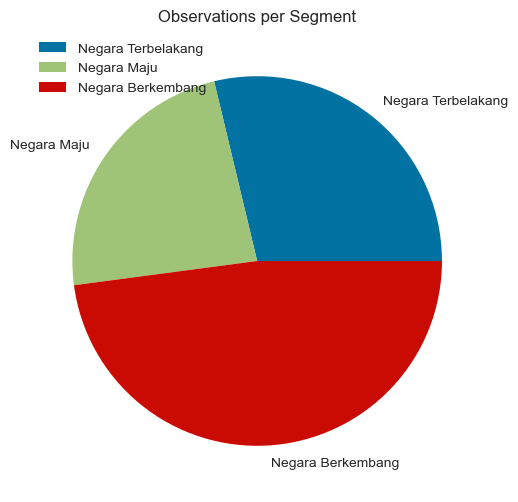

In [91]:
data_pca_kmeans_freq.plot.pie(y='Obs.', figsize=(6, 6))
plt.legend(loc='upper left')
plt.ylabel(None)
plt.title('Observations per Segment')
plt.show()

In [96]:
data_pca_kmeans['Legend'] = data_pca_kmeans['K-Means PCA Segment'].map({0:'Negara Terbelakang', 1:'Negara Maju', 2:'Negara Berkembang'})
data_pca_kmeans.head()

Negara  Kematian_anak  Ekspor  Kesehatan  Impor  Pendapatan  Inflasi  \
0   False           90.2    10.0       7.58   44.9      1610.0     9.44   
1   False           16.6    28.0       6.55   48.6      9930.0     4.49   
2   False           27.3    38.4       4.17   31.4     12900.0    16.10   
3   False          119.0    62.3       2.85   42.9      5900.0    22.40   
4   False           10.3    45.5       6.03   58.9     19100.0     1.44   

   Component 1  Component 2  Component 3  Component 4  Component 5  \
0         56.2         5.82          553    -0.828750    -0.239834   
1         76.3         1.65         4090     0.030136     0.255057   
2         76.5         2.89         4460    -0.118539    -0.001744   
3         60.1         6.16         3530    -0.820331    -0.275233   
4         76.8         2.13        12200     0.293014     0.227075   

   Component 6  Component 7  K-Means PCA Segment              Legend  
0    -0.045052    -0.247512                    0  Negara Terbelakang  
1    -0.276633     0.145215                    2   Negara Berkembang  
2     0.037725     0.449075                    2   Negara Berkembang  
3     0.687311     0.108067                    0  Negara Terbelakang  
4    -0.048907    -0.001048                    2   Negara Berkembang

In [97]:
pred_data_pca_kmeans = data_pca_kmeans.copy()

In [98]:
pred_data_pca_kmeans.columns

Index(['Negara', 'Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan',
       'Inflasi', 'Component 1', 'Component 2', 'Component 3', 'Component 4',
       'Component 5', 'Component 6', 'Component 7', 'K-Means PCA Segment',
       'Legend'],
      dtype='object')

In [99]:
pred_data_pca_kmeans.drop(columns=['Component 1', 'Component 2', 'Component 3', 'Component 4',
       'Component 5', 'Component 6', 'Component 7','Legend'], inplace=True)

In [100]:
pred_data_pca_kmeans

Negara  Kematian_anak  Ekspor  Kesehatan  Impor  Pendapatan  Inflasi  \
0     False           90.2    10.0       7.58   44.9      1610.0     9.44   
1     False           16.6    28.0       6.55   48.6      9930.0     4.49   
2     False           27.3    38.4       4.17   31.4     12900.0    16.10   
3     False          119.0    62.3       2.85   42.9      5900.0    22.40   
4     False           10.3    45.5       6.03   58.9     19100.0     1.44   
..      ...            ...     ...        ...    ...         ...      ...   
162   False           29.2    46.6       5.25   52.7      2950.0     2.62   
163   False           17.1    28.5       4.91   17.6     16500.0    24.16   
164   False           23.3    72.0       6.84   80.2      4490.0    12.10   
165   False           56.3    30.0       5.18   34.4      4480.0    23.60   
166   False           83.1    37.0       5.89   30.9      3280.0    14.00   

     K-Means PCA Segment  
0                      0  
1                      2  
2                      2  
3                      0  
4                      2  
..                   ...  
162                    2  
163                    2  
164                    2  
165                    0  
166                    0  

[167 rows x 8 columns]

# K. Summary

>Reason:

Menggunakan PCA dengan K-Means membutuhkan 7 komponen PCA untuk menangkap setidaknya 90% dari varians data.

>Objektif:

Memperhatikan beberapa kelompok memiliki nilai yang sangat berbeda untuk penggunaan uang muka, yang terkait dengan frekuensi penggunaan kartu kredit. Berdasarkan hal itu lah kami membagi menjadi 4 label atau 4 kelas yaitu Middle Ground, High Cash Advance User, High Credit Frequent Purchase, Frugal Credit Users. 

In [101]:
data_freq = data_pca_kmeans_freq.copy()
data_freq

Negara  Kematian_anak     Ekspor  Kesehatan      Impor  \
K-Means PCA Segment                                                           
Negara Terbelakang      0.0      90.375000  27.948313   6.248125  41.595123   
Negara Maju             0.0       5.671795  51.400000   8.416667  46.316026   
Negara Berkembang       0.0      21.705000  40.720688   6.327500  48.200937   

                       Pendapatan    Inflasi  Component 1  Component 2  \
K-Means PCA Segment                                                      
Negara Terbelakang    3704.645833  10.263021    59.982292     4.957031   
Negara Maju          39834.358974   3.296718    79.733333     1.815897   
Negara Berkembang    11594.250000   6.983363    72.651250     2.288375   

                      Component 3  Component 4  Component 5  Component 6  \
K-Means PCA Segment                                                        
Negara Terbelakang    1786.000000    -0.681775    -0.155978     0.082413   
Negara Maju          29744.871795     0.850537    -0.187918     0.064861   
Negara Berkembang     6036.075000    -0.005572     0.185197    -0.081068   

                     Component 7  Obs.  Obs. Prop.  
K-Means PCA Segment                                 
Negara Terbelakang     -0.118050    48    0.287425  
Negara Maju            -0.097734    39    0.233533  
Negara Berkembang       0.118475    80    0.479042

In [102]:
data_freq.drop(columns=['Component 1', 'Component 2', 'Component 3', 'Component 4',
       'Component 5', 'Component 6', 'Component 7', 'Obs.',
       'Obs. Prop.'], inplace=True)
data_freq

Negara  Kematian_anak     Ekspor  Kesehatan      Impor  \
K-Means PCA Segment                                                           
Negara Terbelakang      0.0      90.375000  27.948313   6.248125  41.595123   
Negara Maju             0.0       5.671795  51.400000   8.416667  46.316026   
Negara Berkembang       0.0      21.705000  40.720688   6.327500  48.200937   

                       Pendapatan    Inflasi  
K-Means PCA Segment                           
Negara Terbelakang    3704.645833  10.263021  
Negara Maju          39834.358974   3.296718  
Negara Berkembang    11594.250000   6.983363


- **Cluster 0 (Merah)** : Middle Ground

Memiliki balance dan limit kartu kredit paling tinggi, lebih sering melakukan pembelian dengan metode sekali bayar(one off purchases), sering melakukan transaksi belanja, hampir tidak pernah melakukan pembelian dengan uang tunai dimuka.Memiliki limit kartu kredit moderat.

- **cluster 1 (Biru)** : High Cash Advance Users

Tipe user yang memiliki balance tinggi dan sering melakukan transaksi pembelian. Jumlah transaksi dengan uang tunai dimuka, hampir sama dengan melakukan pembelian metode mencicil. Memiliki limit kartu kredit paling tinggi.

- **cluster 2 (Ungu)** : Frugal Credit Users

Memiliki balance paling rendah diantara cluster lain, frekuensi pembelian cukup tinggi dan sering melakukan pembelian dengan metode pembayaran mencicil, memiliki limit kartu kredit paling rendah.

- **cluster 3 (Abu)** : High Credit Frequent Purchasers

Tipe user yang memiliki balance moderat, sangat jarang melakukan transaksi pembelian, lebih sering melakukan transaksi dengan uang tunai dimuka, hampir tidak pernah melakukan pembelian dengan metode mencicil. tipe user ini memiliki limit kartu kredit medium.

# Additional Step (Random Forest)

Akan dilakukan penggabungan algoritma K-Means Clustering dengan RandomForest. 

Sumber Referensi: <br>
https://www.kaggle.com/general/271928 <br>
https://www.hindawi.com/journals/geofluids/2021/9321565/ <br>
https://www.quora.com/Can-you-use-random-forest-for-clustering-and-if-so-how

# Import Library

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [104]:
pred_data_pca_kmeans

Negara  Kematian_anak  Ekspor  Kesehatan  Impor  Pendapatan  Inflasi  \
0     False           90.2    10.0       7.58   44.9      1610.0     9.44   
1     False           16.6    28.0       6.55   48.6      9930.0     4.49   
2     False           27.3    38.4       4.17   31.4     12900.0    16.10   
3     False          119.0    62.3       2.85   42.9      5900.0    22.40   
4     False           10.3    45.5       6.03   58.9     19100.0     1.44   
..      ...            ...     ...        ...    ...         ...      ...   
162   False           29.2    46.6       5.25   52.7      2950.0     2.62   
163   False           17.1    28.5       4.91   17.6     16500.0    24.16   
164   False           23.3    72.0       6.84   80.2      4490.0    12.10   
165   False           56.3    30.0       5.18   34.4      4480.0    23.60   
166   False           83.1    37.0       5.89   30.9      3280.0    14.00   

     K-Means PCA Segment  
0                      0  
1                      2  
2                      2  
3                      0  
4                      2  
..                   ...  
162                    2  
163                    2  
164                    2  
165                    0  
166                    0  

[167 rows x 8 columns]

In [105]:
pred_data_pca_kmeans.isna().sum()

Negara                 0
Kematian_anak          0
Ekspor                 0
Kesehatan              0
Impor                  0
Pendapatan             0
Inflasi                0
K-Means PCA Segment    0
dtype: int64

<AxesSubplot:>

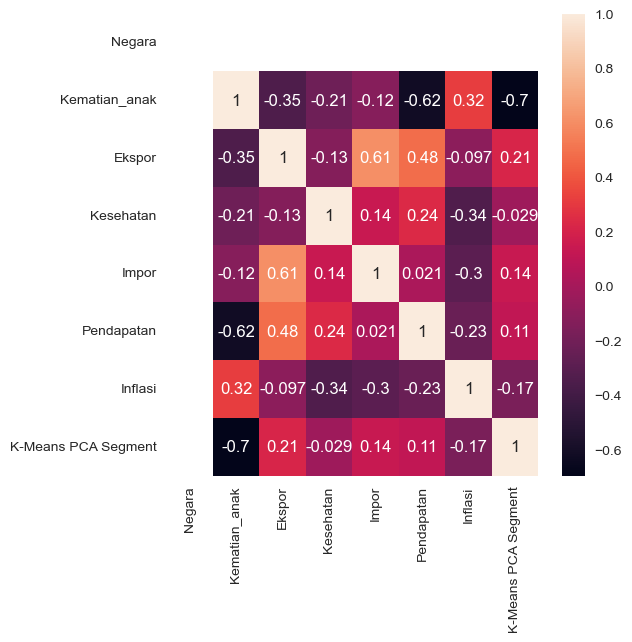

In [107]:
plt.figure(figsize=(6,6))
sns.heatmap(pred_data_pca_kmeans.corr(),annot=True)

# Train-test split and Modelling

In [108]:
X = pred_data_pca_kmeans.drop('K-Means PCA Segment', axis=1)
y = pred_data_pca_kmeans['K-Means PCA Segment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)
ypred = RF.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,ypred))

Accuracy: 0.9117647058823529


Akurasi random forest sebesar 91,18% menunjukkan kinerja model yang sangat baik.

In [111]:
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,ypred))
print (metrics.classification_report(y_test, ypred))
print("-------------------------------------------------------------")

Confusion Matrix:
 [[ 5  0  1]
 [ 0  8  0]
 [ 2  0 18]]
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       1.00      1.00      1.00         8
           2       0.95      0.90      0.92        20

    accuracy                           0.91        34
   macro avg       0.89      0.91      0.90        34
weighted avg       0.92      0.91      0.91        34

-------------------------------------------------------------


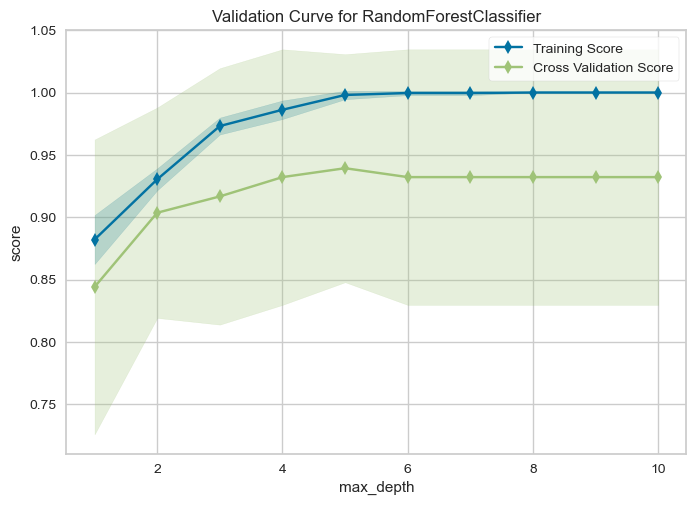

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=20, estimator=RandomForestClassifier(random_state=42),
                n_jobs=-1, param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                scoring='accuracy')


In [112]:
from yellowbrick.model_selection import validation_curve
print(validation_curve(RF, X_train, y_train, param_name="max_depth", n_jobs=-1,
      param_range=np.arange(1, 11), cv=20, scoring="accuracy"))

Dapat dilihat bahwa nilai Training Score dan Cross Validation Score berada di atas dan tidak terlalu jauh dari skor yang diinginkan. Kita dapat menginterpretasikan model memiliki bias yang tidak terlalu tinggi ataupun rendah.

# SELESAI

In [61]:
#gapenting

In [62]:
sc = StandardScaler()
dfoutlier_std = sc.fit_transform(df_outlier_removed.astype(float))

kmeans1 = KMeans(n_clusters=2, random_state=42).fit(dfoutlier_std)
labels1 = kmeans1.labels_ #4

new_dfoutlier_std = pd.DataFrame(data = dfoutlier_std, columns = ['Inflasi', 'Kematian_anak'])
new_dfoutlier_std['label_kmeans1'] = labels1

plt.scatter(new_dfoutlier_std.Builtup[new_dfoutlier_std.label_kmeans1 == 0], new_dfoutlier_std['House_Price'][new_dfoutlier_std.label_kmeans1 == 0], c='blue', s = 100, edgecolor='green', linestyle='-')
plt.scatter(new_dfoutlier_std.Builtup[new_dfoutlier_std.label_kmeans1 == 1], new_dfoutlier_std['House_Price'][new_dfoutlier_std.label_kmeans1 == 1], c='red', s = 100, edgecolor='green', linestyle='-')
                                                                                                                
centers = kmeans1.cluster_centers_ #7
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500)
plt.xlabel('Builtup')
plt.ylabel('House_Price')
plt.show()

NameError: name 'df_outlier_removed' is not defined

In [ ]:
SS_scaler = StandardScaler()
dfoutlier_std = SS_scaler.fit_transform(df_outlier_removed.astype(float))

SS_scaler_df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
SS_scaler_df.head()

### Boxplot data sebelum di handling outliers 

In [ ]:
sns.set({'figure.figsize':(3,3)})
sns.boxplot(x='Kematian_anak', data=df)

In [ ]:
sns.set({'figure.figsize':(3,3)})
sns.boxplot(x='Inflasi', data=df)

### Mencari outliers menggunakan metode Interquartile range

In [ ]:
def get_lower_upper_bound(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return lower_bound, upper_bound

In [ ]:
def get_outliers_iqr(x):
    lower_bound, upper_bound = get_lower_upper_bound(x)
    return x[np.where((x > upper_bound) | (x < lower_bound))]

### Menemukan data pencilan untuk kedua features

In [ ]:
print(get_outliers_iqr(df['Kematian_anak'].values))
print(get_outliers_iqr(df['Inflasi'].values))

### Menangani/Handling Outliers

In [ ]:
def remove_outlier_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_final = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]
    return df_final

In [ ]:
df_outlier_removed = remove_outlier_IQR(df[['Kematian_anak','Inflasi']])
df_outlier_removed.dropna(axis=0, inplace=True)

In [ ]:
df_outlier_removed

### Boxplot data setelah di handling outliers 

In [ ]:
sns.set({'figure.figsize':(3,3)})
sns.boxplot(x='Kematian_anak', data=df_outlier_removed)

In [ ]:
sns.set({'figure.figsize':(3,3)})
sns.boxplot(x='Inflasi', data=df_outlier_removed)

# G. Data Preprocessing

Dapat terlihat korelasi antar harapan hidup dan kematian anak, semakin besar angka harapan hidup maka akan meminimalisasikan angka kematian pada anak